## Name: Steven Olawale
## Student No:202252703
## Course: Understanding Artificial Intelligence 
## Course Code: 771763_A23_T1
### This jupyter note handles the code for section 1 of the summative assignment 

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from scipy.sparse import issparse
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

### The next few lines of code reads the data from a csv format into a dataframe
### There is also a review of the code to check quick check columns and a few lins of data

In [2]:
# Reading the CSV file containing car sales data into a DataFrame named car_sales_df
car_sales_df = pd.read_csv('car_sales_data.csv')

In [3]:
# Displaying the first five rows of the car sales DataFrame to inspect the data structure and contents
car_sales_df.head()

Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101

In [4]:
# Generating and displaying information about the car_sales_df DataFrame, including the number of entries, column names, data types, and memory usage
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


## The below cells of code does a quick exploration of the target variable using histogram combined with density plot
## There is also scatter plot to check the relationship between each numerical features and target features 
## Heatmap was also used to assess the correlation between the all the numeric values and it observered that Year of Manufacture has a strong positive correlation with price while mileage had a fairly negative correlation with price

<Axes: xlabel='Price', ylabel='Count'>

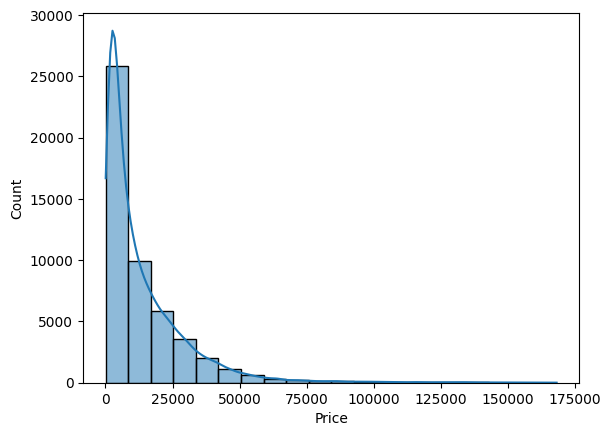

In [5]:
#histogram plot for the 'Price' column
#setting the number of bins to 20 and enabling Kernel Density Estimate (KDE) for a smooth distribution curve
sns.histplot(car_sales_df['Price'], bins =20, kde =True)

In [6]:
#This function creates a scatter plot for visualizing the relationship between two numerical variables
#The function takes a DataFrame, and the names of the numerical and target columns to plot against each other
def plot_scatter(data, numerical_column, target_column):
    """
    Plots a scatter plot of the specified numerical feature against the target variable.

    Parameters:
    - data (DataFrame): The dataset containing the features and target.
    - numerical_column (str): Name of the numerical column to plot.
    - target_column (str): The name of the target column.

    Returns:
    None: Displays the scatter plot.
    """
    #The below line of code sets the figure size for the plot, making it large enough to be easily readable
    plt.figure(figsize=(10, 6))  
    
    #The below line of codecreates a scatter plot with the specified numerical and target columns from the DataFrame
    plt.scatter(data[numerical_column], data[target_column], alpha=0.5)  
    
    #The below line of code sets the title of the plot, clearly indicating what the plot represents
    plt.title(f'Scatter Plot: {numerical_column} vs {target_column}')  
    
    #The below block of code set the labels for the x-axis and y-axis, respectively, making the plot easier to understand
    plt.xlabel(numerical_column)  
    plt.ylabel(target_column)  
     
    
    #This line displays the plot
    plt.show() 


In [26]:
class Plot_scatter:
    """
    This class is designed to create and display scatter plots for visualizing the relationship between two numerical variables.
    It contains the dataset and the specified columns for the plot within an object.
    """
    
    def __init__(self, data, num_column, target_column):
        """
        The constructor of the ScatterPlotter class.
        
        Parameters:
        - data: DataFrame, containing the dataset with the features and target.
        - numerical_column: str, the name of the numerical column in the dataset to be plotted.
        - target_column: str, the name of the target column in the dataset to be plotted.
        """
        # The below block of code initializes the instance variables with the provided dataset and column names.
        self.data = data
        self.num_column = num_column
        self.target_column = target_column
    
    def plot(self):
        """
        This method generates and displays a scatter plot of the numerical feature against the target variable.
        
        It uses the class instance variables initialized during the creation of the object.
        No parameters are required for this method as it operates on instance variables.
        
        The function's return is None, but it has a side effect of displaying a scatter plot.
        """
        # The below line of code sets the figure size for the plot, optimizing readability.
        plt.figure(figsize=(10, 6))
        
        # The below line of code creates a scatter plot with the specified numerical and target columns from the DataFrame.
        plt.scatter(self.data[self.num_column], self.data[self.target_column], alpha=0.5)
        
        # The below line of code sets the title of the plot, providing context for the data being visualized.
        plt.title(f'Scatter Plot: {self.num_column} vs {self.target_column}')
        
        # The below lines of code set the labels for the x-axis and y-axis, enhancing the plot's clarity.
        plt.xlabel(self.num_column)
        plt.ylabel(self.target_column)
        
        # This line of code triggers the display of the plot.
        plt.show()

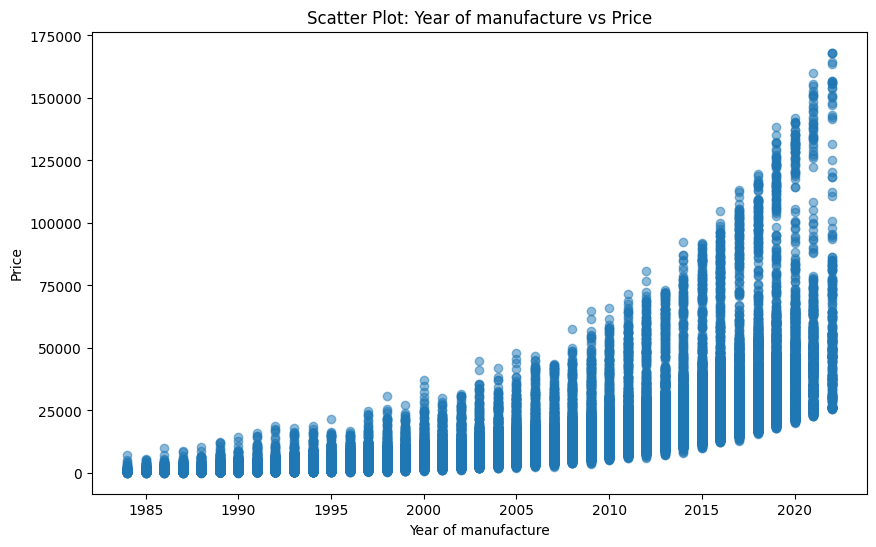

In [27]:
# The below line of code instantiate an object of the Plot_scatter class
# 'Year of manufacture' is the numerical column and 'Price' is the target variable to be plotted.
scat_plot = Plot_scatter(car_sales_df, 'Year of manufacture', 'Price')

# The below line of code calls the 'plot' method on the 'scat_plot' object.
# This method generates and displays a scatter plot of the Year of manufacture' against the 'Price'.
scat_plot.plot()

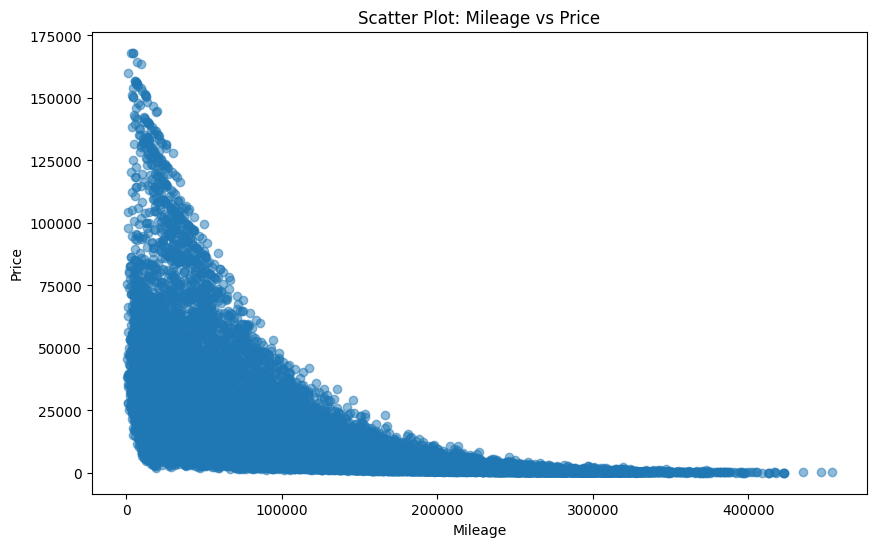

In [28]:
# The below line of code instantiate an object of the Plot_scatter class
# 'Mileage' is the numerical column and 'Price' is the target variable to be plotted.
scat_plot = Plot_scatter(car_sales_df, 'Mileage', 'Price')

# The below line of code calls the 'plot' method on the 'scat_plot' object.
# This method generates and displays a scatter plot of the 'Mileage' against the 'Price'.
scat_plot.plot()

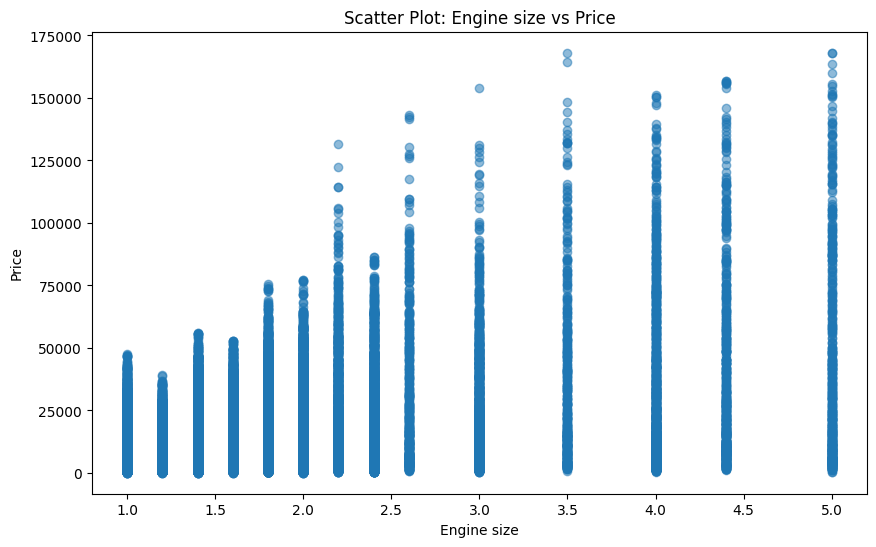

In [25]:
# The below line of code calls the 'plot' method on the 'scat_plot' object.
# 'Engine size'  is the numerical column and 'Price' is the target variable to be plotted.
scat_plot = Plot_scatter(car_sales_df, 'Engine size', 'Price')

# The below line of code calls the 'plot' method on the 'scat_plot' object.
# This method generates and displays a scatter plot of the 'Engine size' against the 'Price'.
scat_plot.plot()

In [13]:
# This function generates and displays a heatmap visualizing the correlation between numerical features in the dataset
# It takes a DataFrame as input and filters out the numerical data for correlation analysis
def plot_correlation_heatmap(data):
    """
    Plots a correlation heatmap for the numerical features in the dataset.

    Parameters:
    data (DataFrame): The dataset containing the features and target.
    """
    # The below line of code selects only numerical columns from the DataFrame to focus on correlation between numerical features
    numerical_data = data.select_dtypes(include=['int64', 'float64'])

    # This below line of code calculates the correlation matrix for the numerical columns, which will be used to visualize the relationships between features
    correlation_matrix = numerical_data.corr()

    #The below line of code sets up the size of the matplotlib figure for the heatmap to ensure it's large enough to be clearly visible
    plt.figure(figsize=(10, 8))

    # The below line of code draws the heatmap with seaborn; annot=True displays the correlation coefficients, fmt=".2f" formats them to 2 decimal places, cmap='coolwarm' sets the color theme, and cbar=True includes a color bar for reference
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

    # The below line of code sets the title of the plot, clearly indicating what the plot represents
    plt.title('Correlation Heatmap of Numerical Features')

    # The below line displays the plot
    plt.show() 


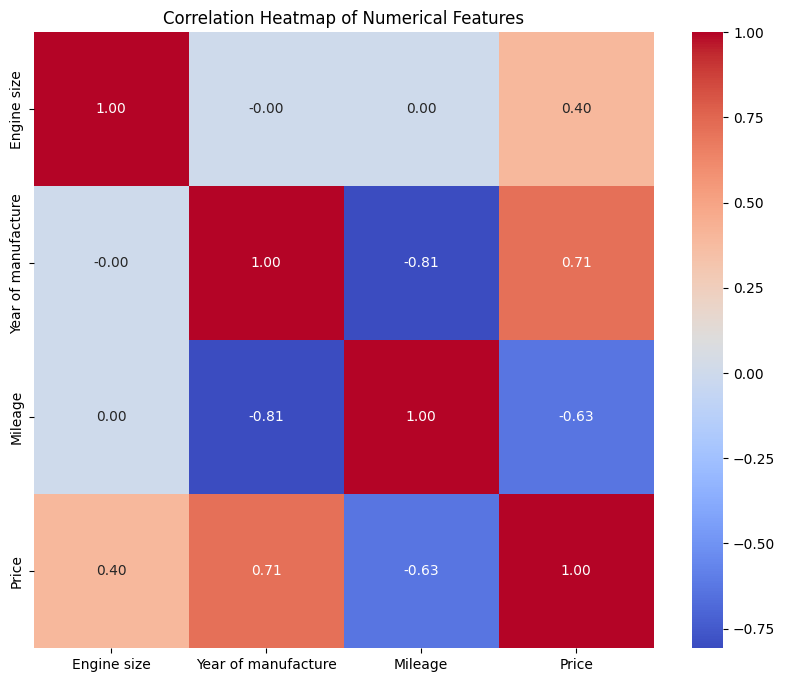

In [14]:
#Calling the plot_correlation_heatmap function to visualize the correlation between all numerical variables in the 'car_sales_df' DataFrame.
plot_correlation_heatmap(car_sales_df)

##  Categorical Comparison

### Categorical comparison was also explored using box plots 

In [15]:
# This function generates a box plot to compare the distribution of a target variable across different categories in a categorical column
# It takes a DataFrame and the names of the categorical and target columns as inputs
def plot_box(data, categorical_column, target_column):
    
    """
    Generates a box plot comparing a categorical column with the target variable.

    Parameters:
    data (DataFrame): The dataset containing the features and target.
    categorical_column (str): The name of the categorical column to compare.
    target_column (str): The name of the target column.
    """
    # The below line of code sets the figure size for the plot, making it large enough to be easily readable
    plt.figure(figsize=(12, 6))  
    
    # The following line of code creates a box plot with the specified categorical and target columns from the DataFrame
    sns.boxplot(x=categorical_column, y=target_column, data=data)  
    
    # This line of code sets the title of the plot, clearly indicating what the plot represents
    plt.title(f'Box Plot: {categorical_column} vs {target_column}')  
    
    # The next line of code rotates the labels on the x-axis to ensure they are readable, especially useful when there are many categories or long names
    plt.xticks(rotation=45)  
    
    # This line of code displays the plot
    plt.show()  

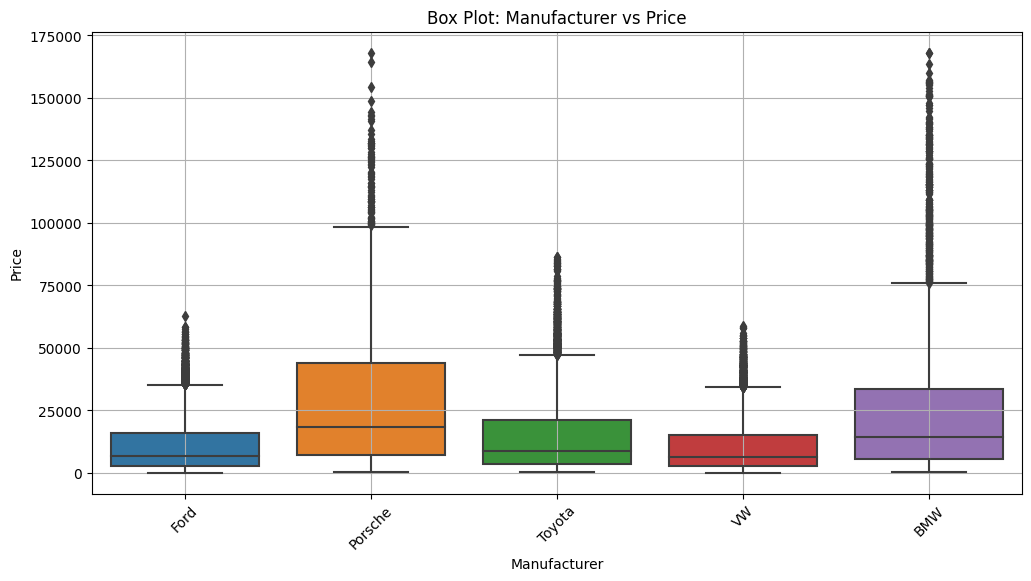

In [16]:
#Calling the plot_box function to create a box plot comparing the 'Price' of cars across different 'Manufacturer' categories in the 'car_sales_df' DataFrame.
plot_box(car_sales_df, 'Manufacturer', 'Price')

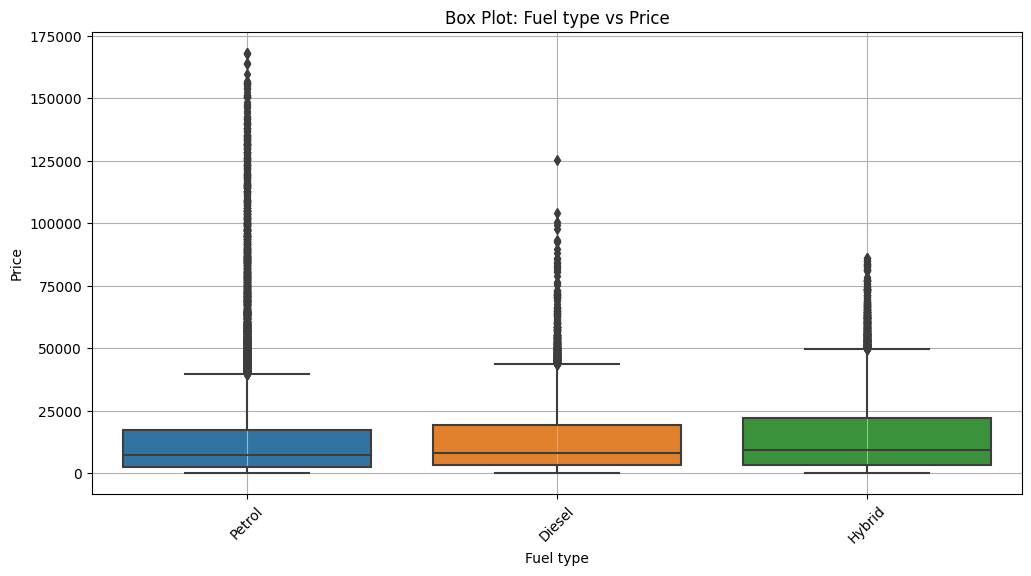

In [17]:
#Calling the plot_box function to create a box plot comparing the 'Price' of cars across different 'Fuel type' categories in the 'car_sales_df' DataFrame.
plot_box(car_sales_df, 'Fuel type', 'Price' )

# Linear regression

### Linear regression was used to build models to predict the price using single numerical features as inputs with price as target

### The evaluations metrics for each model was also evaluated and it was discovered that year of manufature had the best model based on the evaluation metrics used.

In [4]:
# This function reshapes a feature into a 2D array if it's currently a 1D array.
def feature_reshape(feature):
    """
    Reshape feature to a 2D array if it's a 1D array.

    Parameters:
    feature (Series): The feature to reshape.

    Returns:
    ndarray: The reshaped 2D array of the feature.
    """
    # The below block of code checks if the feature is 1D and reshapes it to a 2D array
    #This is for compatibility with models that require 2D inputs.
    if len(feature.shape) == 1:
        feature = feature.to_numpy().reshape(-1, 1)
    
    # This line returns the reshaped feature, which will be 2D if it was originally 1D, or remain unchanged if it was already 2D.
    return feature


In [25]:
# This function standardizes the training and test feature sets using StandardScaler
def standardize_features(x_train, x_test):
    """
    Standardizes the training and test features using StandardScaler.
    
    Parameters:
    x_train (array): Training features.
    x_test (array): Test features.
    
    Returns:
    tuple: The standardized training and test features, and the scaler used for the standardization.
    """
    # This line of code initializes the StandardScaler object
    scaler = StandardScaler()
    
    # The below line of code fits the scaler on the training data and then transforms it to a standardized scale
    x_train_scaled = scaler.fit_transform(x_train)
    
    # This line of code transforms the test data using the same scaler fitted on the training data to ensure consistency
    x_test_scaled = scaler.transform(x_test)
    
    # Returns the standardized training and test features along with the scaler for potential inverse transforms or applying to new data
    return x_train_scaled, x_test_scaled, scaler


In [26]:
#Function to train and evaluate linear regression
#This function handles reshaping of features, splitting of data, standardizing features, fitting the model, predictions, and calculating various performance metrics
def train_and_evaluate_linear_regression(feature, target):
    """
    Trains a linear regression model and evaluates its performance.

    Parameters:
    - feature: array-like or series, the feature set
    - target: array-like or series, the target variable

    Returns:
    tuple: trained model, scaler used for standardization, and dictionary of evaluation metrics
    """
    # This line of code reshapes the feature to a 2D array using the reshape function
    feature = feature_reshape(feature)
    
    # This line of code splits the data into training and test sets, with 80% for training and 20% for testing
    x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
    
    # This line of code uses the standardize feature code on the feature to optimize model performance
    x_train_scaled, x_test_scaled, scaler = standardize_features(x_train, x_test)
    
    # This block of code initializes and fits the Linear Regression model on the training data
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_scaled, y_train)
    
    # This line of code makes predictions on the test data
    y_pred_lin = lin_reg.predict(x_test_scaled)
    
    # This block of code calculates and stores various metrics to evaluate the model
    metrics = {
        'gradient': lin_reg.coef_[0],  # The slope of the regression line
        'intercept': lin_reg.intercept_,  # The intercept of the regression line
        'MAE': mean_absolute_error(y_test, y_pred_lin),  # Mean Absolute Error
        'MSE': mean_squared_error(y_test, y_pred_lin),  # Mean Squared Error
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lin)),  # Root Mean Squared Error
        'R2': r2_score(y_test, y_pred_lin)  # R-squared Score
    }
    
    # This line of code returns the trained model, the scaler, and the evaluation metrics
    return lin_reg, scaler, metrics


In [27]:
#Function to visualize the results of linear regression
#This function plots the actual data points and the predicted regression line to show the model's fit
def plot_lin_regression_results(feature, target, model, scaler, feature_name, target_name):
    """
    Function creates a scatter plot of the actual target values against the feature and overlays a linear regression line. 
    It reshaped the feature, scales the feature for the model, predicts the target values, and plots the results.

    Parameters:
    - feature: array-like or series, the feature set 
    - target: array-like or series, the target variable
    - model: trained model object, the linear regression model used for predicting.
    - scaler: fitted scaler object, used to standardize the feature values for prediction.
    - feature_name: str, the name of the feature for labeling purposes.
    - target_name: str, the name of the target for labeling purposes.

    Returns:
    None: Displays the scatter plot with the regression line.
    """
    # This line of code sets up the figure size for a clear visualization
    plt.figure(figsize=(10, 6))
    
    # This block of code ensures that the feature and target are NumPy arrays and reshaping the feature for modeling
    feature = feature_reshape(feature)
    target = np.array(target)
    
    # This line of code plots the actual data points as a scatter plot for visual comparison
    sns.scatterplot(x=feature.flatten(), y=target, color='blue')
    
    # The below line of code creates a range of values for the fitted line and transforming them using the scaler
    x_fit = np.linspace(feature.min(), feature.max(), 100).reshape(-1, 1)
    x_fit_scaled = scaler.transform(x_fit)
    
    # The below line of code predicts the target values for the fitted line using the trained model
    y_fit = model.predict(x_fit_scaled)
    
    # The below line of code plots the linear regression line to compare against the actual data points
    plt.plot(x_fit, y_fit, color='red', label='Linear Regression Line')
    
    # The below block of code sets the title and axis labels
    plt.title(f'{target_name} vs {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    
    # The below block of code displays the legend and shows the plot
    plt.legend()
    plt.show()


## Engine size linear regression

In [30]:
#The below line of code trains and evaluates a linear regression model using 'Engine size' as the feature and 'Price' as the target from the 'car_sales_df' DataFrame.
#The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
lin_reg, scaler, metrics = train_and_evaluate_linear_regression(car_sales_df['Engine size'], car_sales_df['Price'])

#Printing the evaluation metrics for the linear regression model.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Evaluation Metrics:
gradient: 6575.659995991904
intercept: 13854.6287
MAE: 10817.491562557914
MSE: 230499154.45279127
RMSE: 15182.198604049128
R2: 0.15062562461380213


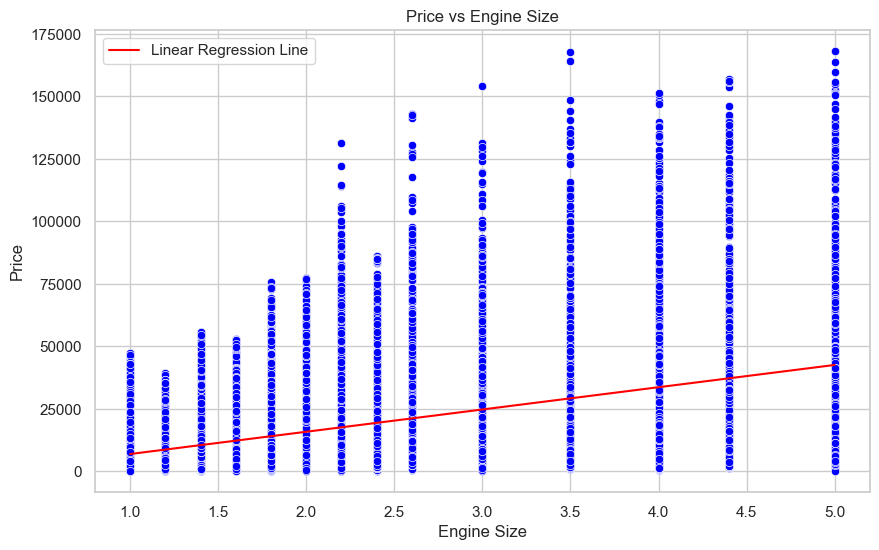

In [31]:
#The below line of code calls the plot_lin_regression_results function to visualize the fit of the linear regression model.
#It plots the actual values and the predicted regression line for 'Engine Size' against 'Price' using the trained model
plot_lin_regression_results(car_sales_df['Engine size'], car_sales_df['Price'], lin_reg, scaler, 'Engine Size', 'Price')

## Year of Manufacture linear regression

In [28]:
#The below line of code trains and evaluates a linear regression model using 'Year of Manufacture' as the feature and 'Price' as the target from the 'car_sales_df' DataFrame.
#The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
lin_reg, scaler, metrics = train_and_evaluate_linear_regression(car_sales_df['Year of manufacture'], car_sales_df['Price'])

#Printing the evaluation metrics for the linear regression model.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics:
gradient: 11711.622036333794
intercept: 13854.628699999997
MAE: 7031.039208675021
MSE: 132678999.94793077
RMSE: 11518.637069893763
R2: 0.5110865244812859


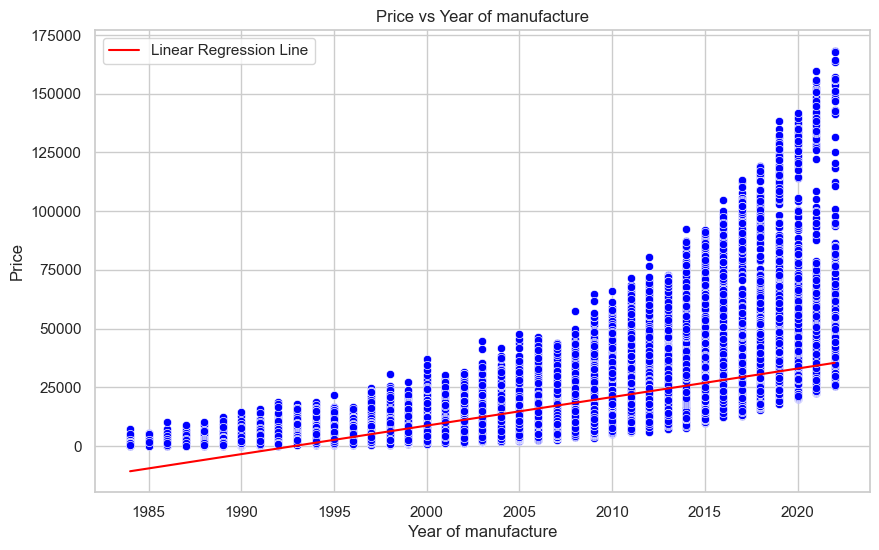

In [29]:
#The below line of code calls the plot_lin_regression_results function to visualize the fit of the linear regression model.
#It plots the actual values and the predicted regression line for 'Year of Manufacture' against 'Price' using the trained model.
plot_lin_regression_results(car_sales_df['Year of manufacture'], car_sales_df['Price'], lin_reg, scaler, 'Year of manufacture', 'Price')

## Mileage linear regression

In [32]:
#The below line of code trains and evaluates a linear regression model using 'Mileage' as the feature and 'Price' as the target from the 'car_sales_df' DataFrame.
#The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
lin_reg, scaler, metrics = train_and_evaluate_linear_regression(car_sales_df['Mileage'], car_sales_df['Price'])

#Printing the evaluation metrics for the linear regression model.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics:
gradient: -10374.07544570737
intercept: 13854.6287
MAE: 7964.784670024696
MSE: 162468566.87254104
RMSE: 12746.315815659875
R2: 0.4013139100884707


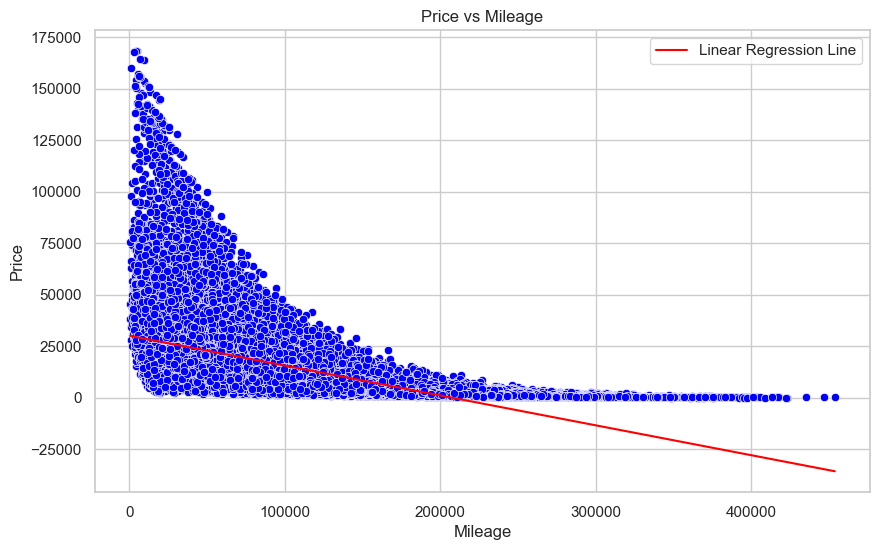

In [33]:
#The below line of code calls the plot_lin_regression_results function to visualize the fit of the linear regression model.
#It plots the actual values and the predicted regression line for 'Mileage' against 'Price' using the trained model and scaler.
plot_lin_regression_results(car_sales_df['Mileage'], car_sales_df['Price'], lin_reg, scaler, 'Mileage', 'Price')

# Polynomial Regression

### Polynomial Regression was used to explore the non linear relationship between all the numerial variable and check if the non linear models generated produces better results than the linear models

### And from the polynomials regressions, it was observed that year of maufacture still produced the best result with better evaluation metrics compared to the results of the linear regression 

In [35]:
#This function transforms the features into polynomial features, standardizes them, trains a polynomial regression model, and evaluates its performance
def polynomial_regression(feature, target, degree):
    """
    Function fits a polynomial regression model on the given feature and target, evaluates its performance, and returns the model, scaler, and metrics. 
    It reshapes the feature, splits the data, standardizes it, creates polynomial features, fits a regression model, and calculates performance metrics.

    Parameters:
    - feature: array-like or series, the feature set
    - target: array-like or series, the target variable
    - degree: int, the degree of the polynomial features.

    Returns:
    tuple: trained polynomial regression model, scaler used for standardization, and dictionary of evaluation metrics.
    """
    # The below line of code reshapes the feature to a 2D array using the feature_reshape function
    feature = feature_reshape(feature)
    
    # The below line of code splits the data into training and test sets, with 80% for training and 20% for testing
    x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
    
    # The below line of code uses the standardize features function to standardize the features to improve model performance
    x_train_scaled, x_test_scaled, scaler = standardize_features(x_train, x_test)
    
    # The below block of code create the polynomial features from the scaled training and test data
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)
    
    # The below block of code initializes the polynomial regression model
    poly_reg = LinearRegression()
    
    #The below line of code fits the Polynomial Regression model on the polynomial features
    poly_reg.fit(x_train_poly, y_train)
    
    # This line of code makes predictions on the polynomial test data
    y_pred_poly = poly_reg.predict(x_test_poly)
    
    # The below block of code calculates and stores the selected metrics to evaluate the model
    metrics = {
        'degree': degree,  # The degree of the polynomial features
        'MAE': mean_absolute_error(y_test, y_pred_poly),  #Mean Absolute Error
        'MSE': mean_squared_error(y_test, y_pred_poly),  #Mean Squared Error
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly)),  #Root Mean Squared Error
        'R2': r2_score(y_test, y_pred_poly)  #R-squared Score
    }
    
    # The below block of code returns the trained model, the scaler, and the evaluation metrics
    return poly_reg, scaler, metrics


In [40]:
#This function plots the actual data points and the predicted polynomial regression line to show the model's fit for a specified degree
def plot_poly_regression_results(feature, target, model, scaler, degree, feature_name, target_name):
    """
    Function creates a scatter plot of the actual target values against the feature and overlays a polynomial regression line of a specified degree. 
    It reshapes the feature, scales it, creates polynomial features for the fitted range, predicts the target values, and plots the results.

    Parameters:
    - feature: array-like or series, the feature set
    - target: array-like or series, the target variable
    - model: trained model object, the polynomial regression model used for predicting.
    - scaler: fitted scaler object, used to standardize the feature values for prediction.
    - degree: int, the degree of the polynomial features.
    - feature_name: str, the name of the feature for labeling purposes.
    - target_name: str, the name of the target for labeling purposes.

    Returns:
    None: Displays the scatter plot with the polynomial regression line.
    """
    # The below line of code sets up the figure size for a clear visualization
    plt.figure(figsize=(10, 6))
    
    # The below line of code reshapes the feature to a 2D array using the feature_reshape function
    feature = feature_reshape(feature)
    
    # The below line of code plots the actual data points as a scatter plot for visual comparison
    sns.scatterplot(x=feature.flatten(), y=target, color='blue')
    
    # The below block of code prepares a range of values for the fitted line, transforming them using the scaler, and creating polynomial features
    x_fit = np.linspace(feature.min(), feature.max(), 100).reshape(-1, 1)
    x_fit_scaled = scaler.transform(x_fit)
    poly_features = PolynomialFeatures(degree=degree)
    x_fit_poly = poly_features.fit_transform(x_fit_scaled)
    
    # The below line of code prepares the target values for the fitted polynomial line using the trained model
    y_fit = model.predict(x_fit_poly)
    
    # The below line of code plot the polynomial regression line to compare against the actual data points
    plt.plot(x_fit, y_fit, color='red', label=f'Polynomial Degree {degree}')
    
    # The below block of code sets the title and axis labels
    plt.title(f'{target_name} vs {feature_name} (Degree {degree})')
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    
    # The below block of code displays the legend and showing the plot
    plt.legend()
    plt.show()


Evaluation Metrics for Degree 2:
degree: 2
MAE: 10807.26234714869
MSE: 230326165.99946904
RMSE: 15176.500452985498
R2: 0.15126307580028653


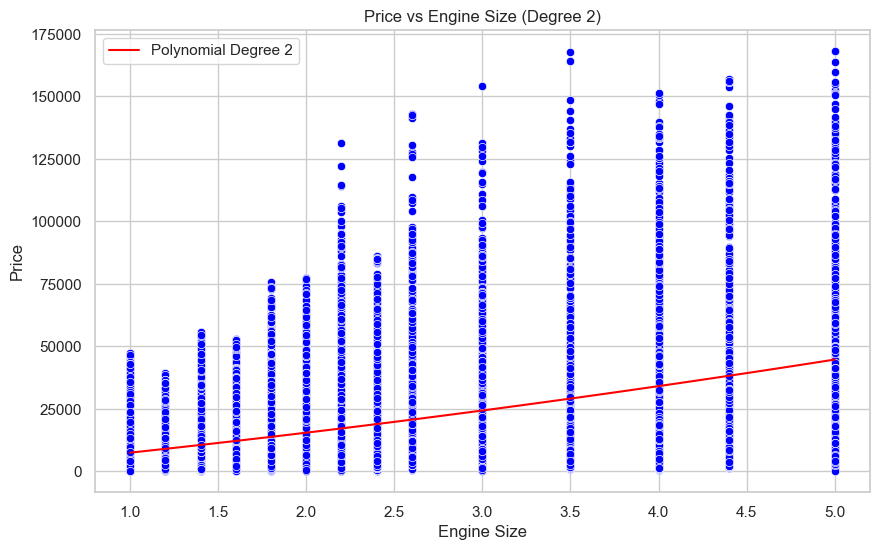

Evaluation Metrics for Degree 3:
degree: 3
MAE: 10802.868982730883
MSE: 230076036.26779428
RMSE: 15168.257522464282
R2: 0.15218478757450593


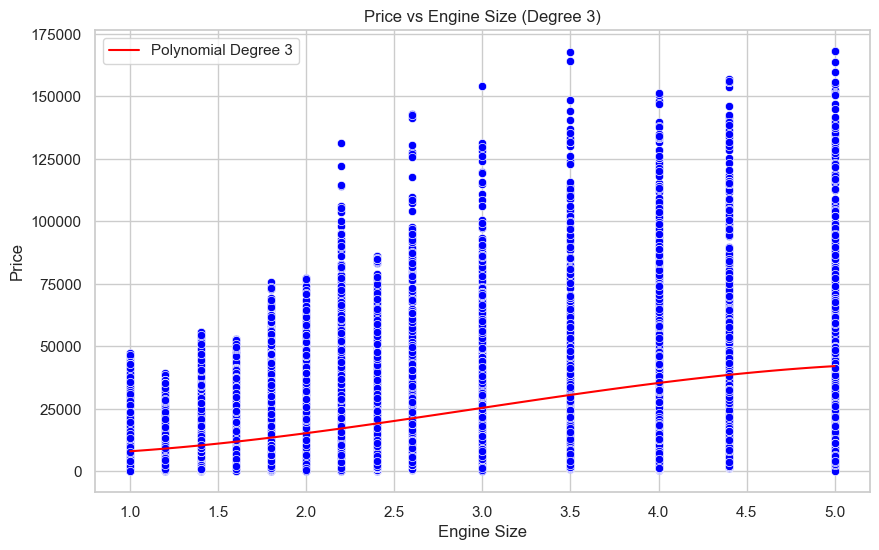

Evaluation Metrics for Degree 4:
degree: 4
MAE: 10801.446336622152
MSE: 230012047.3259903
RMSE: 15166.148071477817
R2: 0.1524205826584638


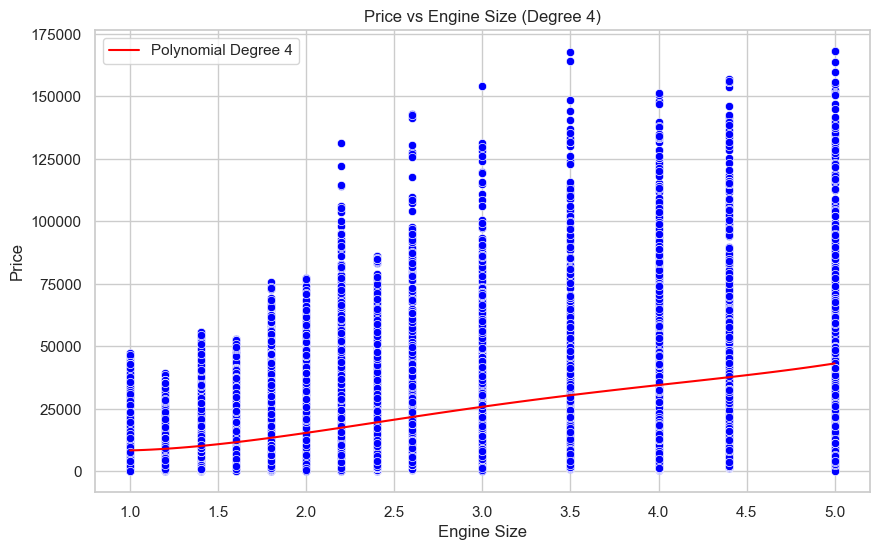

Evaluation Metrics for Degree 5:
degree: 5
MAE: 10801.138446122195
MSE: 230001460.47862178
RMSE: 15165.799038580913
R2: 0.15245959450166247


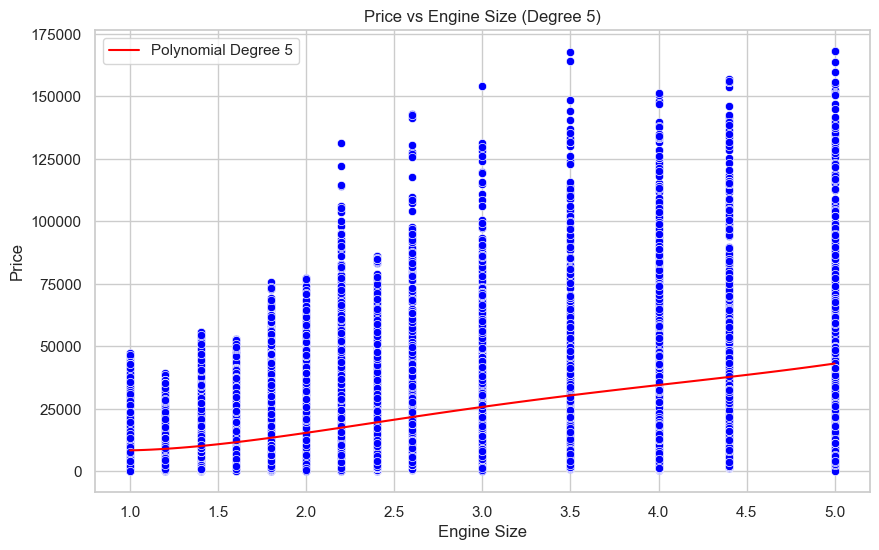

In [37]:
#The below loop runs through specified degrees [2, 3, 4, 5] for the polynomial regression model.
#For each degree, it trains the model, evaluates its performance, prints the evaluation metrics, and plots the results.
for degree in [2, 3, 4, 5]:
    
    #Training and evaluating a polynomial regression model with the current degree using 'Engine size' as the feature and 'Price' as the target.
    #The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
    poly_reg, scaler, metrics = polynomial_regression(car_sales_df['Engine size'], car_sales_df['Price'], degree)
    
    #The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
    print(f"Evaluation Metrics for Degree {degree}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    
    #This line plots the actual values and the predicted polynomial regression line for 'Engine Size' against 'Price' using the plot_poly_regression_results function
    plot_poly_regression_results(car_sales_df['Engine size'], car_sales_df['Price'], poly_reg, scaler, degree, 'Engine Size', 'Price')


Evaluation Metrics for Degree 2:
degree: 2
MAE: 5387.109074987047
MSE: 105993894.20194316
RMSE: 10295.333612950246
R2: 0.6094194015754404


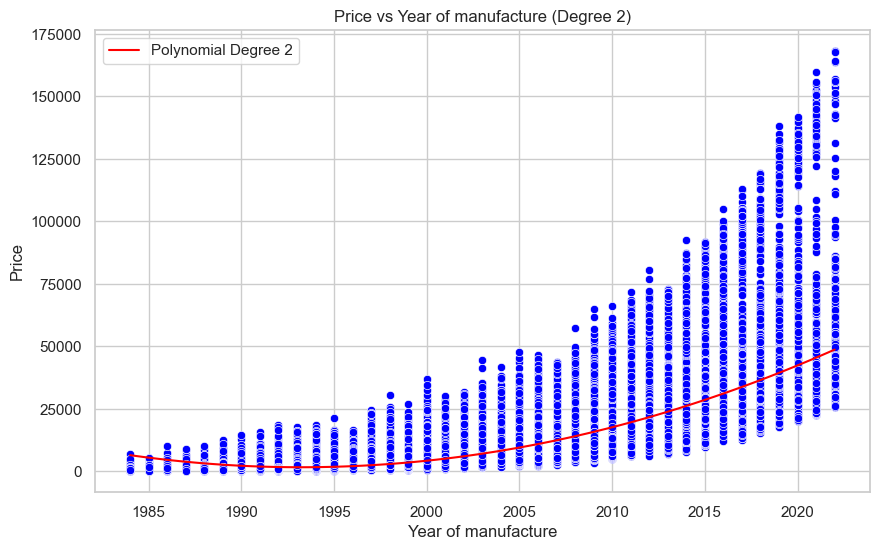

Evaluation Metrics for Degree 3:
degree: 3
MAE: 5186.868941344745
MSE: 103043508.14527176
RMSE: 10151.034831251036
R2: 0.6202913820821917


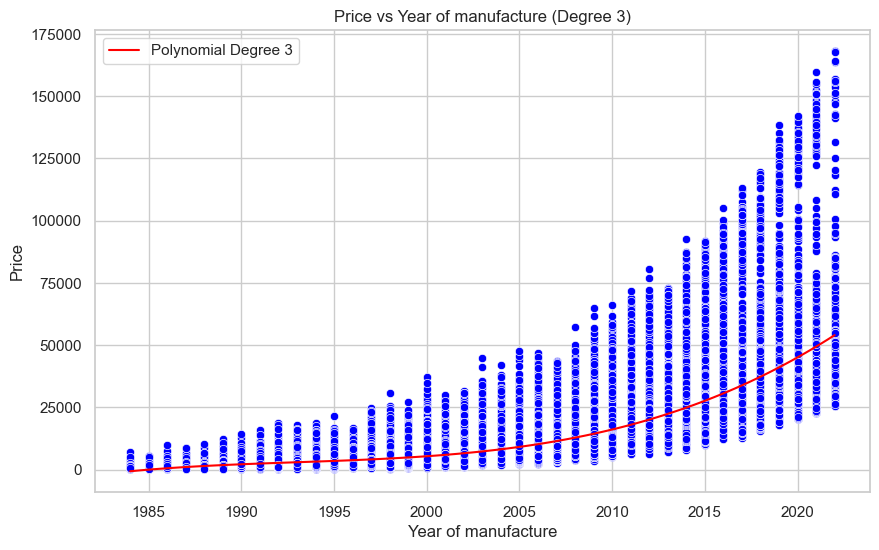

Evaluation Metrics for Degree 4:
degree: 4
MAE: 5162.883981090758
MSE: 102720854.73230515
RMSE: 10135.129734359849
R2: 0.6214803388996488


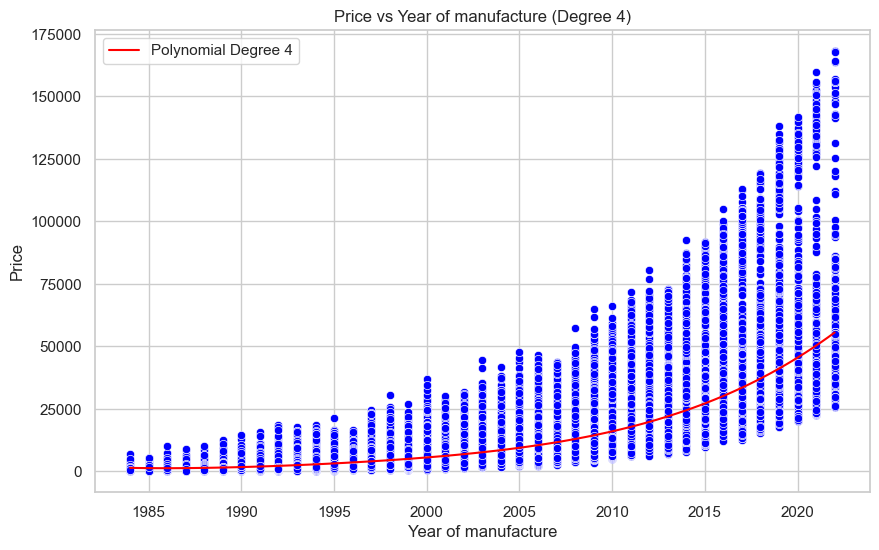

Evaluation Metrics for Degree 5:
degree: 5
MAE: 5160.772689003983
MSE: 102654671.46530674
RMSE: 10131.864165360032
R2: 0.6217242199290662


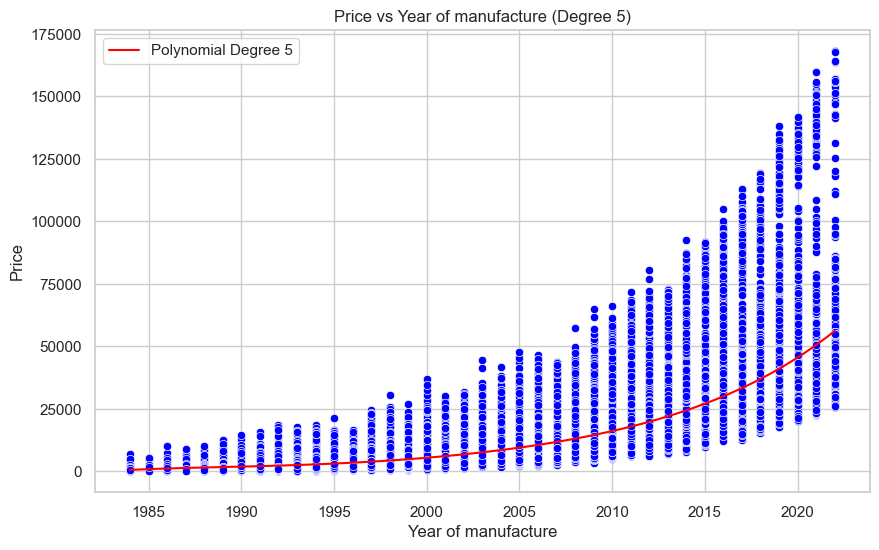

In [38]:
#The below loop runs through specified degrees [2, 3, 4, 5] for the polynomial regression model.
#For each degree, it trains the model, evaluates its performance, prints the evaluation metrics, and plots the results.
for degree in [2, 3, 4, 5]:
    
    #Training and evaluating a polynomial regression model with the current degree using 'Year of Manufacture' as the feature and 'Price' as the target.
    #The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
    poly_reg, scaler, metrics = polynomial_regression(car_sales_df['Year of manufacture'], car_sales_df['Price'], degree)
    
    #The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
    print(f"Evaluation Metrics for Degree {degree}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
        
    #This line plots the actual values and the predicted polynomial regression line for 'Engine Size' against 'Price' using the plot_poly_regression_results function
    plot_poly_regression_results(car_sales_df['Year of manufacture'], car_sales_df['Price'], poly_reg, scaler, degree, 'Year of manufacture', 'Price')

Evaluation Metrics for Degree 2:
degree: 2
MAE: 6409.911605271274
MSE: 129620312.16261968
RMSE: 11385.091662460152
R2: 0.5223575898060919


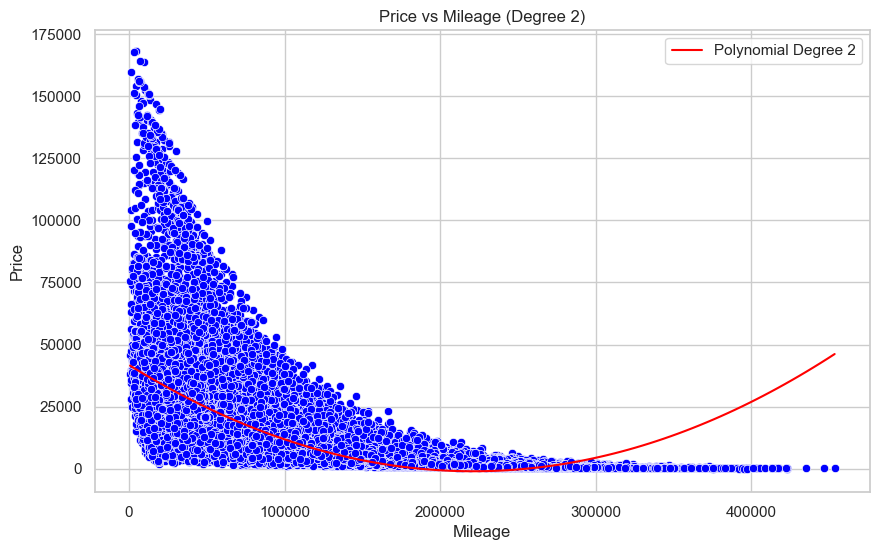

Evaluation Metrics for Degree 3:
degree: 3
MAE: 5815.669418610487
MSE: 122123243.4158437
RMSE: 11050.93857624065
R2: 0.5499837999721879


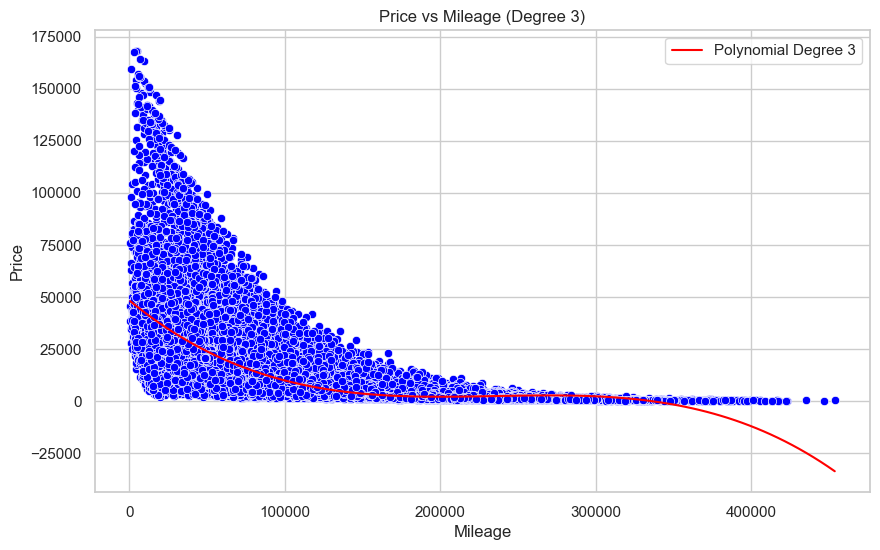

Evaluation Metrics for Degree 4:
degree: 4
MAE: 5719.6716155491085
MSE: 120800573.84612858
RMSE: 10990.931436694917
R2: 0.5548577512119927


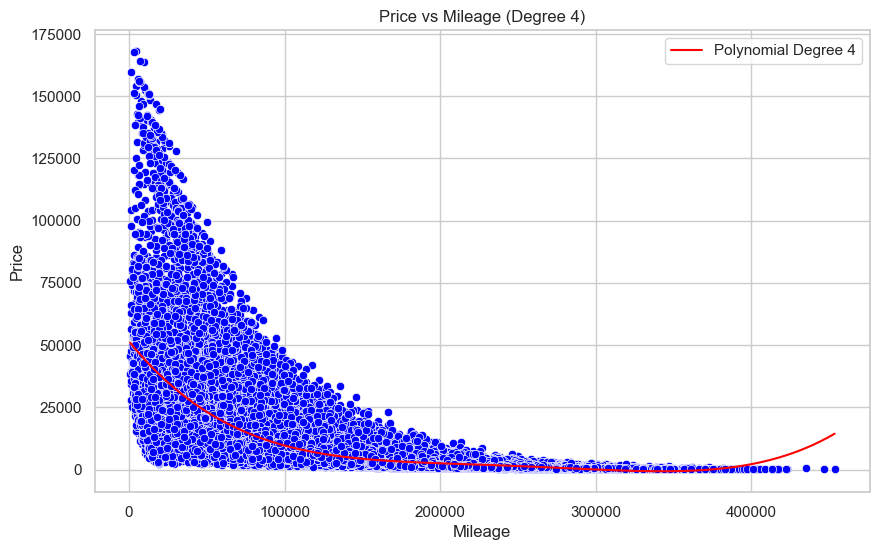

Evaluation Metrics for Degree 5:
degree: 5
MAE: 5698.012248246017
MSE: 120626997.2625581
RMSE: 10983.032243536305
R2: 0.5554973696201462


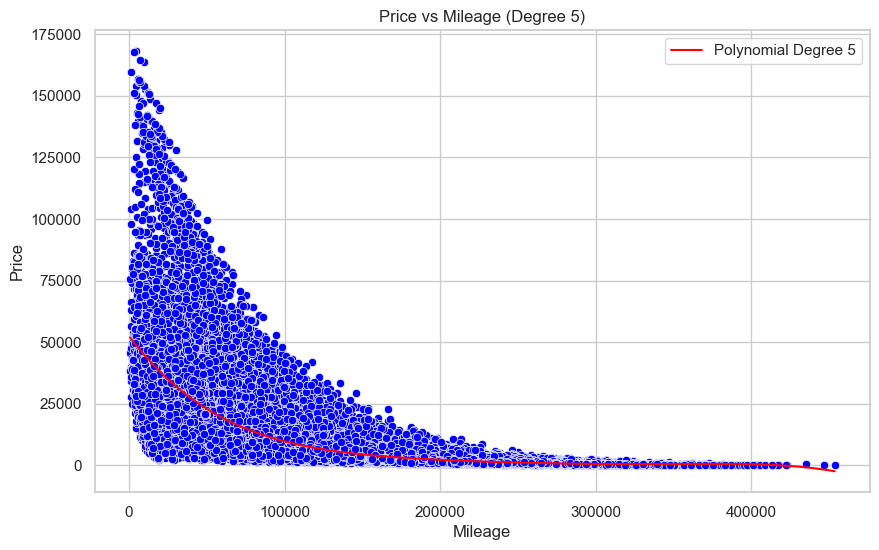

In [42]:
#The below loop runs through specified degrees [2, 3, 4, 5] for the polynomial regression model.
#For each degree, it trains the model, evaluates its performance, prints the evaluation metrics, and plots the results.
for degree in [2, 3, 4, 5]:
    
    #Training and evaluating a polynomial regression model with the current degree using 'Mileage' as the feature and 'Price' as the target.
    #The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
    poly_reg, scaler, metrics = polynomial_regression(car_sales_df['Mileage'], car_sales_df['Price'], degree)
    print(f"Evaluation Metrics for Degree {degree}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    plot_poly_regression_results(car_sales_df['Mileage'], car_sales_df['Price'], poly_reg, scaler, degree, 'Mileage', 'Price')

# Multiple Linear Regression

### Multiple linear regression was explored using all the numerical features to predict prices 
### The resultant evaluation metrics gotten after generating the model showed even better result compared to the non linear models previously evaluated.

In [40]:
#This function trains and evaluats the performance of a multiple linear regression model
def multiple_linear_regression(features, target):
    """
    Function fits a multiple linear regression model on the given features and target, evaluates its performance, and returns the model, scaler, and metrics.
    It splits the data, standardizes the features, fits a multiple linear regression model, makes predictions, and calculates performance metrics.

    Parameters:
    - features: array-like or DataFrame, the set of independent variables.
    - target: array-like or series, the dependent variable.

    Returns:
    tuple: trained multiple linear regression model, scaler used for standardization, and dictionary of evaluation metrics.
    """
    # The below line of code splits the data into training and test sets, with 80% for training and 20% for testing
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # The below line of code splits the features to improve model performance
    x_train_scaled, x_test_scaled, scaler = standardize_features(x_train, x_test)
    
    # The below line of code initializes and fits the Multiple Linear Regression model
    mult_lin_reg = LinearRegression()
    
    # The below line of code fits the Multiple Linear Regression model on the scaled training data
    mult_lin_reg.fit(x_train_scaled, y_train)
    
    # The below line of code makes predictions on the scaled test data
    y_pred_mult_lin = mult_lin_reg.predict(x_test_scaled)
    
    # The below block of code calculates and stores the selected metrics to evaluate the model
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred_mult_lin),  # Mean Absolute Error
        'MSE': mean_squared_error(y_test, y_pred_mult_lin),  # Mean Squared Error
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_mult_lin)),  # Root Mean Squared Error
        'R2': r2_score(y_test, y_pred_mult_lin)  # R² Score
    }
    
    # The below line of code returns the trained Multiple Linear Regression model, the scaler, and the evaluation metrics
    return mult_lin_reg, scaler, metrics


In [41]:
#The below block of code defines the features and target for the multiple linear regression model.
#The features include 'Engine size', 'Mileage', and 'Year of manufacture', and the target is 'Price'.
features = car_sales_df[['Engine size', 'Mileage', 'Year of manufacture']] 
target = car_sales_df['Price']

#Training and evaluating a multiple linear regression model using the defined features and target.
#The function returns the trained model, the scaler used for standardization, and a dictionary of evaluation metrics.
mult_lin_reg, scaler, metrics = multiple_linear_regression(features, target)

#Printing the evaluation metrics for the multiple linear regression model.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value, providing an assessment of the model's performance.
print("Evaluation Metrics for Multiple Linear Regression:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for Multiple Linear Regression:
MAE: 6091.458141656275
MSE: 89158615.76017143
RMSE: 9442.38400829851
R2: 0.671456306417368


# Random Forest 

### The random forest regression used to include the categorical features in the predictive modelling process to predict used car prices.
### The expectation was that the combination of numerical and categorical features would produce a better predictive model compared to other regression technique
### The random forest regression acutually met expectation as it produced better results compared to previous regression techniques used.

In [44]:
#Function to train and evaluate Random Forest regression with categorical and numerical features
#This function prepares the dataset, creates and configures a pipeline with preprocessing steps for both categorical and numerical features, trains a Random Forest Regressor, and evaluates its performance
def train_evaluate_rf_with_categorical(data, numerical_features, categorical_features, target):
    """
    Funtion trains and evaluates a Random Forest Regressor on the given dataset using both categorical and numerical features. 
    It preprocesses the data, fits a Random Forest model, predicts on the test set, and calculates evaluation metrics.

    Parameters:
    - data (DataFrame): The dataset containing the features and target.
    - numerical_features (list): List of column names for numerical features.
    - categorical_features (list): List of column names for categorical features.
    - target (str): Name of the target column.

    Returns:
    dict: A dictionary containing the evaluation metrics.
    """

    # The below block of code splits the data into features and target for model training and testing
    x = data.drop(target, axis=1)
    y = data[target]

    # The below line of code the data into training and test sets with 80% for training and 20% for testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # The below block of code creates a transformation pipeline for numerical features to standardize them
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # The below line of code creates a transformer for categorical features using One-Hot Encoding 
    # This converts the categorical variables into a form that can be used by the random forest algorithm
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # The below block of code combines both numerical and categorical transformers into a preprocessor for parallel processing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # The below line of code initializes the Random Forest regression model with specified parameters
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # The below line of code creates a pipeline combining the preprocessor and the Random Forest model for sequential processing
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # The below line of code trains the model with the preprocessed training data
    pipeline.fit(x_train, y_train)

    # The below line of code makes predictions on the preprocessed test data using the trained model
    y_pred = pipeline.predict(x_test)

    # The below block of code calculates and stores the selected metrics to evaluate the model's performance
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),  # Mean Absolute Error
        'MSE': mean_squared_error(y_test, y_pred),  # Mean Squared Error
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),  # Root Mean Squared Error
        'R2': r2_score(y_test, y_pred)  # R² Score indicating the goodness of fit
    }

    # The below line of code returns the stored evaluation metrics
    return metrics


In [45]:
#The below lines of code defines the numerical and categorical features to be used in the Random Forest regression model, along with the target variable 'Price'.
numerical_features = ['Engine size', 'Mileage', 'Year of manufacture'] 
categorical_features = ['Manufacturer', 'Model', 'Fuel type']  
target = 'Price'

#Training and evaluating a Random Forest regression model using the specified numerical and categorical features.
#The train_evaluate_rf_with_categorical function returns a dictionary of evaluation metrics assessing the model's performance.
metrics = train_evaluate_rf_with_categorical(car_sales_df, numerical_features, categorical_features, target)

#Printing the evaluation metrics for the Random Forest regression model.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for Random Forest Regression with Categorical and Numerical Features:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for Random Forest Regression with Categorical and Numerical Features:
MAE: 287.693997
MSE: 401091.50671473
RMSE: 633.3178559891786
R2: 0.9985220039145163


## Artificial Neural Network (ANN)

### Artificial Neural Network was also to employed to capture complex patterns within the dataset and produce better prediction results

### ANN produced better results espiecially the baseline model, even after tuning several parameters , the baseline model came up as the best model 

In [53]:
#Function to preprocess data
#This function applies standard scaling to numerical features and one-hot encoding to categorical features, and separates the target variable
def preprocess_data(df, numerical_features, categorical_features, target):
    """
    Preprocesses the input DataFrame by applying standard scaling to numerical features and one-hot encoding to categorical features. 
    It also separates the target variable from the features.

    Parameters:
    - df (DataFrame): The dataset to preprocess.
    - numerical_features (list): List of column names for numerical features.
    - categorical_features (list): List of column names for categorical features.
    - target (str): Name of the target column.

    Returns:
    tuple: A tuple containing the preprocessed feature matrix and the target array.
    """

    # This line of code isolates the features by dropping the target column
    x = df.drop(target, axis=1)
    
    # This line of code isolates the target variable as an array
    y = df[target].values

    # This block of code creates a preprocessor with ColumnTransformer to apply transformations to numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),  # Applying standard scaling to numerical features
            ('cat', OneHotEncoder(), categorical_features)  # Applying one-hot encoding to categorical features
        ])
    
    # This line of code applies the preprocessor to the features to create a transformed feature matrix
    x_processed = preprocessor.fit_transform(x)
    
    # The below line of code returns the processed feature matrix and the target array
    return x_processed, y


In [54]:
#Function to build an Artificial Neural Network (ANN) model
#This function constructs an ANN with specified default parameters 
#These parameters includes the number of hidden layers, units per layer, dropout rate, and activation functions for both hidden and output layers
def build_ann_model(input_dim, hidden_layers=2, units_per_layer=64, dropout_rate=0.2, activation='relu', 
                    output_units=1, output_activation='linear'):
    """
    Functins constructs an Artificial Neural Network (ANN) model with specified architecture parameters. 
    It includes one or more hidden layers with a specified number of units, a dropout layer to prevent overfitting, 
    and an output layer with a specified activation function.

    Parameters:
    - input_dim (int): The number of input features.
    - hidden_layers (int): The number of hidden layers in the network.
    - units_per_layer (int): The number of neurons in each hidden layer.
    - dropout_rate (float): The dropout rate to prevent overfitting.
    - activation (str): The activation function for the hidden layers.
    - output_units (int): The number of units in the output layer.
    - output_activation (str): The activation function for the output layer.

    Returns:
    Sequential: A compiled Keras Sequential model ready for training.
    """

    # The below line of code initializes the Sequential model so that other layers can be added
    model = Sequential()

    # The below line of code adds the input layer with specified units and activation function
    model.add(Dense(units=units_per_layer, activation=activation, input_dim=input_dim))

    # The below line of code adds the hidden layers with specified units, activation function, and dropout rate
    for _ in range(hidden_layers - 1):
        model.add(Dense(units=units_per_layer, activation=activation))  # Adding a Dense layer
        model.add(Dropout(dropout_rate))  # Adding a Dropout layer to prevent overfitting

    # The below line the output layer with specified units and activation function
    model.add(Dense(units=output_units, activation=output_activation))

    # The below line of code outputs the model summary to provide an overview of the ANN architecture
    model.summary()

    # returns the constructed model
    return model


In [55]:
#Function to compile, train, and evaluate an Artificial Neural Network (ANN) model
#This function compiles the model with specified default optimizer and loss function, 
# trains it using the training data and evaluates its performance on the test data
def compile_train_evaluate_model(model, x_train, y_train, x_test, y_test, 
                                 optimizer='adam', loss='mean_squared_error', 
                                 metrics=['mean_squared_error'], 
                                 epochs=200, batch_size=None, validation_split=0.1,
                                 patience=20):
    """
    # Function compiles the provided model with given optimizer and loss function, trains it on the training dataset while applying specified early stopping 
    # The function also evaluates its performance on the test dataset.
    # Returning the trained model, training history, and evaluation metrics.

    Parameters:
    - model (Sequential): The ANN model to compile, train, and evaluate.
    - x_train (array): The feature matrix for the training data.
    - y_train (array): The target array for the training data.
    - x_test (array): The feature matrix for the test data.
    - y_test (array): The target array for the test data.
    - optimizer (str): The optimization algorithm to use.
    - loss (str): The loss function to use.
    - metrics (list): The list of metrics to evaluate during training and testing.
    - epochs (int): The number of epochs to train the model.
    - batch_size (int): The number of samples per batch of computation.
    - validation_split (float): The fraction of the training data to be used as validation data.
    - patience (int): Number of epochs with no improvement on validation loss to wait before stopping training.

    Returns:
    tuple: The trained model, training history, and a dictionary of evaluation metrics.
    """

    # The below block of code checks if the matrices 'x_train' or 'x_test' are sparse and converts them to dense matrices i.e regular numpy array 
    if issparse(x_train):
        x_train = x_train.toarray()
    if issparse(x_test):
        x_test = x_test.toarray()
    
    # The below line of code coompiles the model with the specified default optimizer, loss function, and metrics
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # The below line of code sets up EarlyStopping to prevent overfitting
    # It acts by stopping training when the validation loss hasn't improved for 'patience' epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1)
    
    # This line of code trains the model on the training data with specified default parameters
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=validation_split, verbose=1, 
                        callbacks=[early_stopping])

    # This line of code makes predictions on the test data
    y_pred = model.predict(x_test)

    # This block of code calculates and stores evaluation metrics to assess the model's performance
    evaluation_metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),  # Mean Absolute Error
        'MSE': mean_squared_error(y_test, y_pred),  # Mean Squared Error
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),  # Root Mean Squared Error
        'R2': r2_score(y_test, y_pred)  # R² Score indicating the goodness of fit
    }

    # This line of code returns the trained model, its training history, and the evaluation metrics
    return model, history, evaluation_metrics


In [56]:
#Function to perform the full workflow for the ANN model
#This function encompasses the entire process of building, training, and evaluating an ANN model with specified architecture and training parameters
def full_ann_workflow(df, numerical_features, categorical_features, target, 
                      hidden_layers=2, units_per_layer=64, dropout_rate=0.2, 
                      activation='relu', output_units=1, output_activation='linear', 
                      optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'], 
                      epochs=200, batch_size=None, validation_split=0.1, patience=20):
    """
    Function runs the full workflow for training and evaluating an Artificial Neural Network (ANN) model. 
    It preprocesses the data, builds the ANN model, compiles it, trains it with early stopping, and evaluates its performance.

    Parameters:
    - df (DataFrame): The dataset to use for the model.
    - numerical_features (list): List of column names for numerical features.
    - categorical_features (list): List of column names for categorical features.
    - target (str): Name of the target column.
    - hidden_layers, units_per_layer, dropout_rate, activation, output_units, output_activation: Parameters for building the ANN model.
    - optimizer, loss, metrics, epochs, batch_size, validation_split, patience: Parameters for compiling, training, and evaluating the model.

    Returns:
    tuple: The trained model, training history, and evaluation metrics.
    """

    #The below line of code uses the preprocess function to preprocess the data 
    # It does this by splitting it into features and target and applying transformations
    x, y = preprocess_data(df, numerical_features, categorical_features, target)

    # The below line of code splits the preprocessed data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # The beloe line of code builds the ANN model with the earlier specified default architecture parameters
    model = build_ann_model(input_dim=x_train.shape[1], hidden_layers=hidden_layers, 
                            units_per_layer=units_per_layer, dropout_rate=dropout_rate, 
                            activation=activation, output_units=output_units, output_activation=output_activation)
    
    # The below block of code compiles, trains, and evaluates the model with the specified training parameters
    trained_model, history, metrics = compile_train_evaluate_model(
        model, x_train, y_train, x_test, y_test, optimizer=optimizer, 
        loss=loss, metrics=metrics, epochs=epochs, batch_size=batch_size, 
        validation_split=validation_split, patience=patience)
    
    # This line of code returns the trained model, its training history, and the evaluation metrics
    return trained_model, history, metrics


In [57]:
#Assigning the 'car_sales_df' DataFrame to a variable named 'df' 

#Defining the numerical features to be used in the analysis.
numerical_features = ['Engine size', 'Mileage', 'Year of manufacture']

#Defining the categorical features to be used in the analysis.
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

#Specifying the target variable for the model.
target = 'Price'


## Running the ANN Code with Default Parameters (Baseline Model)
## The baseline model performed very well with very little evidence of overfitting
## The evaluation metrics also produced better results than the random forest regression 
## However several hyper parameters were tuned to check if better ANN results could be gotten compared to the results of the baseline model

In [62]:
#The code call the full_ann_workflow function with default parameters which returns the trained ANN model, its training history, and a dictionary of evaluation metrics assessing the model's performance.
#It utilizes the previously defined 'df' DataFrame along with the specified numerical, categorical features, and the target variable 'Price'.
trained_model, history, evaluation_metrics = full_ann_workflow(
    car_sales_df, numerical_features, categorical_features, target)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1728      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5953 (23.25 KB)
Trainable params: 5953 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 1s 439us/step - loss: 254741488.0000 - mean_squared_error: 254741488.0000 - val_loss: 70639136.

Epoch 39/200
1125/1125 [==============================] - 0s 401us/step - loss: 3764042.7500 - mean_squared_error: 3764042.7500 - val_loss: 446359.0312 - val_mean_squared_error: 446359.0312
Epoch 40/200
1125/1125 [==============================] - 0s 400us/step - loss: 3503918.5000 - mean_squared_error: 3503918.5000 - val_loss: 414206.5000 - val_mean_squared_error: 414206.5000
Epoch 41/200
1125/1125 [==============================] - 0s 399us/step - loss: 3530495.5000 - mean_squared_error: 3530495.5000 - val_loss: 382205.4688 - val_mean_squared_error: 382205.4688
Epoch 42/200
1125/1125 [==============================] - 0s 415us/step - loss: 3513203.7500 - mean_squared_error: 3513203.7500 - val_loss: 416528.4688 - val_mean_squared_error: 416528.4688
Epoch 43/200
1125/1125 [==============================] - 0s 399us/step - loss: 3482891.2500 - mean_squared_error: 3482891.2500 - val_loss: 357861.0625 - val_mean_squared_error: 357861.0625
Epoch 44/200
1125/1125 [==========================

1125/1125 [==============================] - 0s 398us/step - loss: 3405332.0000 - mean_squared_error: 3405332.0000 - val_loss: 248899.0469 - val_mean_squared_error: 248899.0469
Epoch 126/200
1125/1125 [==============================] - 0s 402us/step - loss: 3368263.0000 - mean_squared_error: 3368263.0000 - val_loss: 303880.4062 - val_mean_squared_error: 303880.4062
Epoch 127/200
1125/1125 [==============================] - 0s 396us/step - loss: 3249857.0000 - mean_squared_error: 3249857.0000 - val_loss: 243216.3125 - val_mean_squared_error: 243216.3125
Epoch 128/200
1125/1125 [==============================] - 0s 402us/step - loss: 3256773.0000 - mean_squared_error: 3256773.0000 - val_loss: 275298.1250 - val_mean_squared_error: 275298.1250
Epoch 129/200
1125/1125 [==============================] - 0s 399us/step - loss: 3436573.5000 - mean_squared_error: 3436573.5000 - val_loss: 296460.3438 - val_mean_squared_error: 296460.3438
Epoch 130/200
1125/1125 [==============================] - 

Epoch 168/200
1125/1125 [==============================] - 0s 402us/step - loss: 3236420.2500 - mean_squared_error: 3236420.2500 - val_loss: 211100.0781 - val_mean_squared_error: 211100.0781
Epoch 169/200
1125/1125 [==============================] - 0s 399us/step - loss: 3374593.0000 - mean_squared_error: 3374593.0000 - val_loss: 241386.5625 - val_mean_squared_error: 241386.5625
Epoch 170/200
1125/1125 [==============================] - 0s 401us/step - loss: 3297526.2500 - mean_squared_error: 3297526.2500 - val_loss: 202762.7812 - val_mean_squared_error: 202762.7812
Epoch 171/200
1125/1125 [==============================] - 0s 397us/step - loss: 3222721.5000 - mean_squared_error: 3222721.5000 - val_loss: 188710.8906 - val_mean_squared_error: 188710.8906
Epoch 172/200
1125/1125 [==============================] - 0s 402us/step - loss: 3334169.0000 - mean_squared_error: 3334169.0000 - val_loss: 213772.4531 - val_mean_squared_error: 213772.4531
Epoch 173/200
1125/1125 [====================

In [63]:
#Converting the training history of the ANN model into a pandas DataFrame.
history_df = pd.DataFrame(history.history)

#Displaying the last 11 entries of the training history DataFrame which helps in understanding how the model's performance evolved in the most recent epochs, indicating convergence or stability.
history_df.tail(11)


loss  mean_squared_error       val_loss  val_mean_squared_error
189  3283636.75          3283636.75  196474.984375           196474.984375
190  3267210.00          3267210.00  154823.140625           154823.140625
191  3454156.25          3454156.25  234673.265625           234673.265625
192  3263253.25          3263253.25  248304.484375           248304.484375
193  3218661.50          3218661.50  178848.312500           178848.312500
194  3338970.00          3338970.00  164591.968750           164591.968750
195  3291515.00          3291515.00  193858.890625           193858.890625
196  3195864.00          3195864.00  191522.187500           191522.187500
197  3372248.75          3372248.75  185864.890625           185864.890625
198  3212682.25          3212682.25  168043.062500           168043.062500
199  3284770.75          3284770.75  162560.703125           162560.703125

In [64]:
#Printing the evaluation metrics for the ANN model.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for ANN with Categorical and Numerical Features:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for ANN with Categorical and Numerical Features:
MAE: 213.9793002258301
MSE: 142055.87562458892
RMSE: 376.9030055924056
R2: 0.9994765333481808


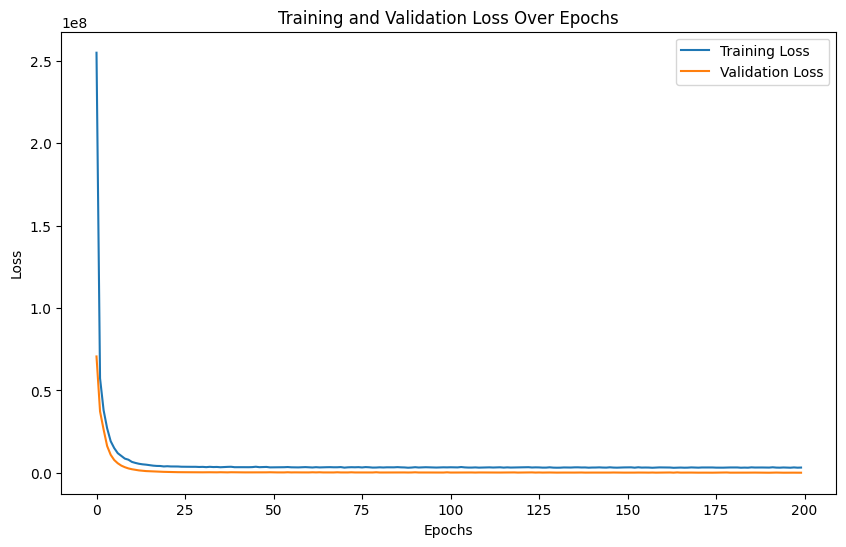

In [65]:
#Setting up the figure size for better visibility.
plt.figure(figsize=(10, 6))

#Plotting the training loss from the history DataFrame. 
#This represents how the model's error decreased over epochs on the training set.
plt.plot(history_df["loss"], label="Training Loss")

#Plotting the validation loss from the history DataFrame.
#This represents how the model's error decreased over epochs on the validation set.
#Comparing the validation loss with the training loss helps in identifying overfitting.
plt.plot(history_df["val_loss"], label="Validation Loss")

#Adding a title to the plot to indicate what is being displayed.
plt.title('Training and Validation Loss Over Epochs')

#Labeling the x-axis as 'Epochs' to represent the number of epochs.
plt.xlabel('Epochs')

#Labeling the y-axis as 'Loss' to represent the loss value.
plt.ylabel('Loss')

# The block of code displays the legend and shows the plot
plt.legend()
plt.show()


### Hyper Parameter Tuning (learning rate 0.01)
### To check if the model learning can be optimized
### However, the resultant plot looks like there was evidence of overfitting in the training process
### There was also decrease in the performance as evidenced by the evaluation metrics when compared with the baseline model

In [66]:
#The code call the full_ann_workflow function with default parameters which returns the trained ANN model, its training history, and a dictionary of evaluation metrics assessing the model's performance.
#However, the learning rate is increased from the default to 0.01, to potentially enhance the model's learning process.
#It utilizes the previously defined 'df' DataFrame along with the specified numerical, categorical features, and the target variable 'Price'.
trained_model, history, evaluation_metrics = full_ann_workflow(
    car_sales_df, numerical_features, categorical_features, target, optimizer=Adam(learning_rate = 0.01))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1728      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5953 (23.25 KB)
Trainable params: 5953 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 1s 405us/step - loss: 52912900.0000 - mean_squared_error: 52912900.0000 - val_loss: 4197864.500

Epoch 39/200
1125/1125 [==============================] - 0s 366us/step - loss: 3487852.2500 - mean_squared_error: 3487852.2500 - val_loss: 306539.9375 - val_mean_squared_error: 306539.9375
Epoch 40/200
1125/1125 [==============================] - 0s 438us/step - loss: 3423009.0000 - mean_squared_error: 3423009.0000 - val_loss: 294340.0625 - val_mean_squared_error: 294340.0625
Epoch 41/200
1125/1125 [==============================] - 1s 446us/step - loss: 3347199.0000 - mean_squared_error: 3347199.0000 - val_loss: 340418.8750 - val_mean_squared_error: 340418.8750
Epoch 42/200
1125/1125 [==============================] - 0s 417us/step - loss: 3490502.2500 - mean_squared_error: 3490502.2500 - val_loss: 186367.6406 - val_mean_squared_error: 186367.6406
Epoch 43/200
1125/1125 [==============================] - 0s 413us/step - loss: 3531898.5000 - mean_squared_error: 3531898.5000 - val_loss: 184458.9688 - val_mean_squared_error: 184458.9688
Epoch 44/200
1125/1125 [==========================

In [67]:
#Converting the training history of the ANN model with learning rate = 0.01 into a pandas DataFrame.
history_df = pd.DataFrame(history.history)

#Displaying the last 11 entries of the training history DataFrame which helps in understanding how the model's performance evolved in the most recent epochs, indicating convergence or stability.
history_df.tail(11)

loss  mean_squared_error      val_loss  val_mean_squared_error
86  3402809.75          3402809.75  1.509773e+06            1.509773e+06
87  3483029.50          3483029.50  2.567336e+05            2.567336e+05
88  3300683.00          3300683.00  1.890797e+05            1.890797e+05
89  3268847.50          3268847.50  2.896416e+05            2.896416e+05
90  3308129.50          3308129.50  1.140836e+05            1.140836e+05
91  3334815.75          3334815.75  1.744218e+05            1.744218e+05
92  3405317.50          3405317.50  2.193689e+05            2.193689e+05
93  3367847.00          3367847.00  1.417335e+05            1.417335e+05
94  3252250.25          3252250.25  3.372836e+05            3.372836e+05
95  3386953.25          3386953.25  7.424299e+05            7.424299e+05
96  3346396.75          3346396.75  2.165281e+05            2.165281e+05

In [68]:
#Printing the evaluation metrics for the ANN model with learning rate = 0.01.
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for ANN with Categorical and Numerical Features:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for ANN with Categorical and Numerical Features:
MAE: 306.1198145019531
MSE: 209742.16021439614
RMSE: 457.9761568186669
R2: 0.9992271137968068


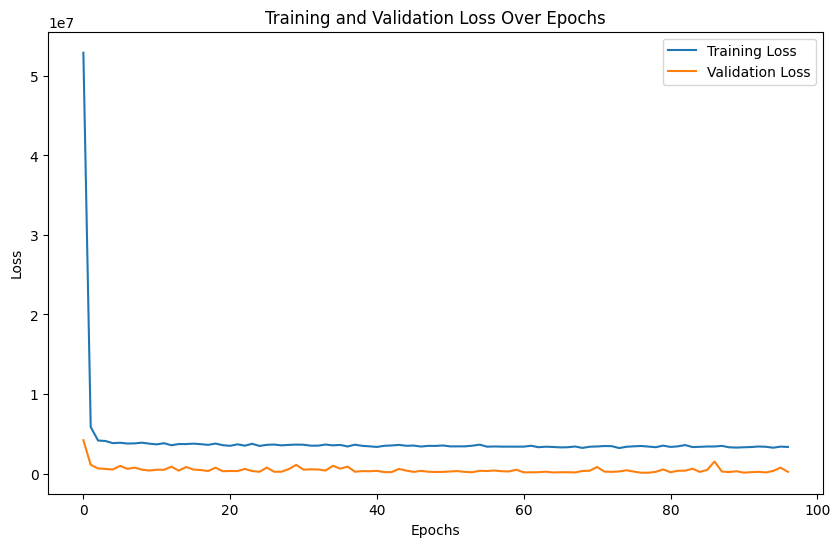

In [69]:

#Setting up the figure size for better visibility.
plt.figure(figsize=(10, 6))

#Plotting the training loss from the history DataFrame. 
#This represents how the model's error decreased over epochs on the training set.
plt.plot(history_df["loss"], label="Training Loss")

#Plotting the validation loss from the history DataFrame.
#This represents how the model's error decreased over epochs on the validation set.
#Comparing the validation loss with the training loss helps in identifying overfitting.
plt.plot(history_df["val_loss"], label="Validation Loss")

#Adding a title to the plot to indicate what is being displayed.
plt.title('Training and Validation Loss Over Epochs')

#Labeling the x-axis as 'Epochs' to represent the number of epochs.
plt.xlabel('Epochs')

#Labeling the y-axis as 'Loss' to represent the loss value.
plt.ylabel('Loss')

# The block of code displays the legend and shows the plot
plt.legend()
plt.show()


## Hidden Layers Increased to 4, Units per layer increased to 256
## More Layers were added to ascertain if there were more complex patterns within the dataset that had not been uncovered by the architecture of the baseline model 
## Result of this shows that the baseline model architecture was sufficient as it showed better plot and evaluation metrics, this could also be interpreted as the dataset not being large enough to capture any further patterns and this has led to some overfitting

In [73]:
#The code call the full_ann_workflow function with default parameters which returns the trained ANN model, its training history, and a dictionary of evaluation metrics assessing the model's performance.
#However, the hidden layer was increased to 4 with units of 256 each, this aims to create a more complex model that may capture deeper patterns in the data.
#It utilizes the previously defined 'df' DataFrame along with the specified numerical, categorical features, and the target variable 'Price'.
trained_model, history, evaluation_metrics = full_ann_workflow(
    car_sales_df, numerical_features, categorical_features, target, hidden_layers=4,
    units_per_layer=256)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               6912      
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [77]:
#Converting the training history of the ANN model with increased hidden layers and units per layer
history_df = pd.DataFrame(history.history)

#Displaying the last 11 entries of the training history DataFrame which helps in understanding how the model's performance evolved in the most recent epochs, indicating convergence or stability.
history_df.tail(11)

loss  mean_squared_error      val_loss  val_mean_squared_error
0   35287060.00         35287060.00  1.304257e+06            1.304257e+06
1    3432901.00          3432901.00  8.556204e+05            8.556204e+05
2    2904821.25          2904821.25  7.362855e+05            7.362855e+05
3    2972571.00          2972571.00  9.074446e+05            9.074446e+05
4    2994311.25          2994311.25  2.739485e+05            2.739485e+05
5    2766965.50          2766965.50  1.691808e+06            1.691808e+06
6    2871256.00          2871256.00  1.043618e+06            1.043618e+06
7    2768605.75          2768605.75  2.734238e+05            2.734238e+05
8    2553058.75          2553058.75  2.145040e+05            2.145040e+05
9    2671143.75          2671143.75  5.264419e+05            5.264419e+05
10   2763901.50          2763901.50  1.350284e+06            1.350284e+06

In [78]:
#Printing the evaluation metrics for the ANN model with increased hidden layers and units per layer
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for ANN with Categorical and Numerical Features:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for ANN with Categorical and Numerical Features:
MAE: 346.09132493133546
MSE: 535678.7719559129
RMSE: 731.9007937937442
R2: 0.9980260586056471


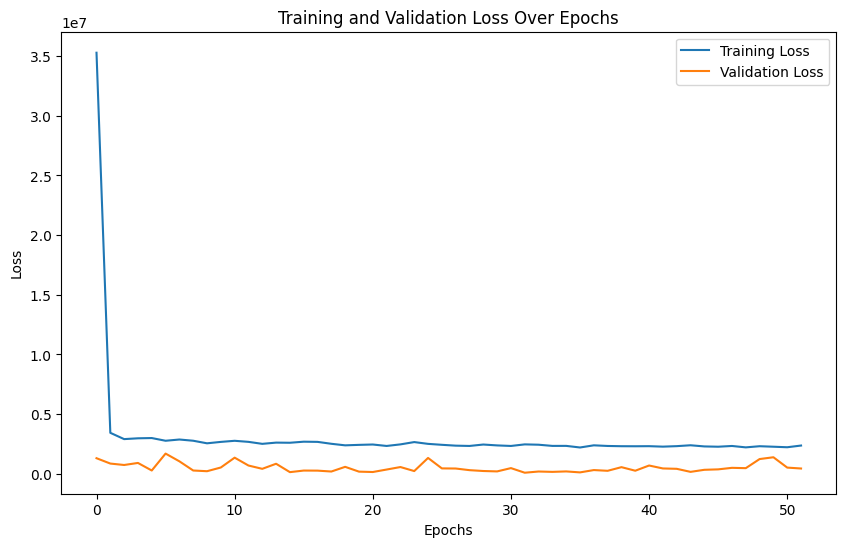

In [79]:
#Setting up the figure size for better visibility.
plt.figure(figsize=(10, 6))

#Plotting the training loss from the history DataFrame. 
#This represents how the model's error decreased over epochs on the training set.
plt.plot(history_df["loss"], label="Training Loss")

#Plotting the validation loss from the history DataFrame.
#This represents how the model's error decreased over epochs on the validation set.
#Comparing the validation loss with the training loss helps in identifying overfitting.
plt.plot(history_df["val_loss"], label="Validation Loss")

#Adding a title to the plot to indicate what is being displayed.
plt.title('Training and Validation Loss Over Epochs')

#Labeling the x-axis as 'Epochs' to represent the number of epochs.
plt.xlabel('Epochs')

#Labeling the y-axis as 'Loss' to represent the loss value.
plt.ylabel('Loss')

# The block of code displays the legend and shows the plot
plt.legend()
plt.show()


## The dropout_rate was increased form  0.5 to capture and reduce overfitting
## The increase did not change the result postively, the baseline model still had better result which may mean that there was never a problem of overfitting in the first place

In [80]:
#The code call the full_ann_workflow function with default parameters which returns the trained ANN model, its training history, and a dictionary of evaluation metrics assessing the model's performance.
#However, the drop out rate is increased from the default of 0.2 to 0.5, to potentially reduce any form of overfitting.
#It utilizes the previously defined 'df' DataFrame along with the specified numerical, categorical features, and the target variable 'Price'.
trained_model, history, evaluation_metrics = full_ann_workflow(
    car_sales_df, numerical_features, categorical_features, target, dropout_rate=0.5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                1728      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5953 (23.25 KB)
Trainable params: 5953 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 1s 460us/step - loss: 258504832.0000 - mean_squared_error: 258504832.0000 - val_loss: 71910136.

In [81]:
#Converting the training history of the ANN model with increased drop out rate from 0.2 to 0.5
history_df = pd.DataFrame(history.history)

#Displaying the last 11 entries of the training history DataFrame which helps in understanding how the model's performance evolved in the most recent epochs, indicating convergence or stability.
history_df.tail(11)

loss  mean_squared_error     val_loss  val_mean_squared_error
0   258504832.0         258504832.0  71910136.00             71910136.00
1    65613100.0          65613100.0  39271076.00             39271076.00
2    49790352.0          49790352.0  29639864.00             29639864.00
3    40425796.0          40425796.0  23097854.00             23097854.00
4    32938706.0          32938706.0  15938826.00             15938826.00
5    26995450.0          26995450.0  11993770.00             11993770.00
6    23601432.0          23601432.0   9030432.00              9030432.00
7    21977958.0          21977958.0   7022918.50              7022918.50
8    19864394.0          19864394.0   5864977.00              5864977.00
9    18993062.0          18993062.0   4666666.00              4666666.00
10   17106208.0          17106208.0   4089716.25              4089716.25

In [82]:
#Printing the evaluation metrics for the ANN model with increased drop out rate from 0.2 to 0.5
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for ANN with Categorical and Numerical Features:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for ANN with Categorical and Numerical Features:
MAE: 656.2146296295166
MSE: 1388707.9712224337
RMSE: 1178.434542612543
R2: 0.9948827015506798


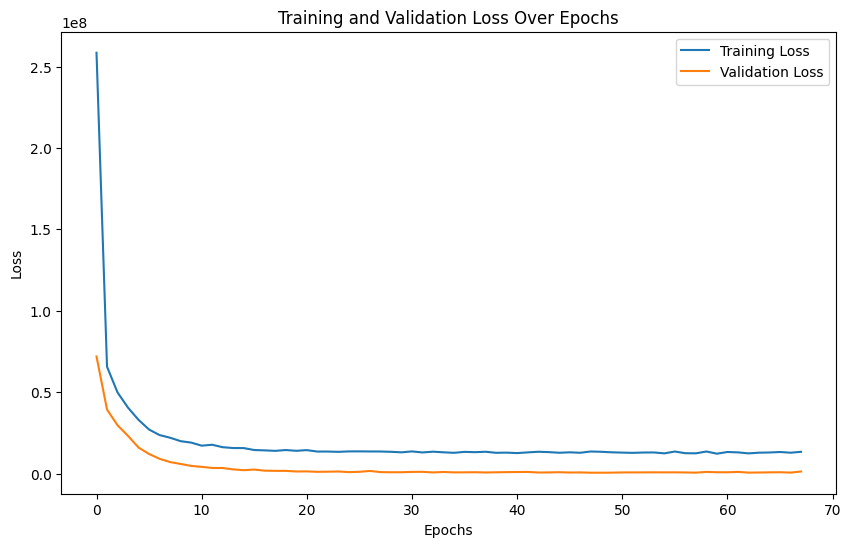

In [83]:
#Setting up the figure size for better visibility.
plt.figure(figsize=(10, 6))

#Plotting the training loss from the history DataFrame. 
#This represents how the model's error decreased over epochs on the training set.
plt.plot(history_df["loss"], label="Training Loss")

#Plotting the validation loss from the history DataFrame.
#This represents how the model's error decreased over epochs on the validation set.
#Comparing the validation loss with the training loss helps in identifying overfitting.
plt.plot(history_df["val_loss"], label="Validation Loss")

#Adding a title to the plot to indicate what is being displayed.
plt.title('Training and Validation Loss Over Epochs')

#Labeling the x-axis as 'Epochs' to represent the number of epochs.
plt.xlabel('Epochs')

#Labeling the y-axis as 'Loss' to represent the loss value.
plt.ylabel('Loss')

# The block of code displays the legend and shows the plot
plt.legend()
plt.show()


## Even with the evident success of the baseline model compared with other adjusted model, further experiment was carried out on the activation function
## The activation function was changed from 'ReLU' to 'tanh' to explore potential improvements, however no improvement was observed

In [84]:
trained_model, history, evaluation_metrics = full_ann_workflow(
    car_sales_df, numerical_features, categorical_features, target, activation='tanh')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                1728      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5953 (23.25 KB)
Trainable params: 5953 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 1s 445us/step - loss: 461498176.0000 - mean_squared_error: 461498176.0000 - val_loss: 442300928

1125/1125 [==============================] - 0s 392us/step - loss: 337944960.0000 - mean_squared_error: 337944960.0000 - val_loss: 320389600.0000 - val_mean_squared_error: 320389600.0000
Epoch 79/200
1125/1125 [==============================] - 0s 389us/step - loss: 336570688.0000 - mean_squared_error: 336570688.0000 - val_loss: 319094720.0000 - val_mean_squared_error: 319094720.0000
Epoch 80/200
1125/1125 [==============================] - 0s 396us/step - loss: 335332736.0000 - mean_squared_error: 335332736.0000 - val_loss: 317808192.0000 - val_mean_squared_error: 317808192.0000
Epoch 81/200
1125/1125 [==============================] - 0s 392us/step - loss: 333995232.0000 - mean_squared_error: 333995232.0000 - val_loss: 316525280.0000 - val_mean_squared_error: 316525280.0000
Epoch 82/200
1125/1125 [==============================] - 0s 390us/step - loss: 332688384.0000 - mean_squared_error: 332688384.0000 - val_loss: 315248608.0000 - val_mean_squared_error: 315248608.0000
Epoch 83/200


Epoch 119/200
1125/1125 [==============================] - 0s 402us/step - loss: 288706816.0000 - mean_squared_error: 288706816.0000 - val_loss: 272007584.0000 - val_mean_squared_error: 272007584.0000
Epoch 120/200
1125/1125 [==============================] - 0s 402us/step - loss: 287697440.0000 - mean_squared_error: 287697440.0000 - val_loss: 270933888.0000 - val_mean_squared_error: 270933888.0000
Epoch 121/200
1125/1125 [==============================] - 0s 408us/step - loss: 286548512.0000 - mean_squared_error: 286548512.0000 - val_loss: 269871584.0000 - val_mean_squared_error: 269871584.0000
Epoch 122/200
1125/1125 [==============================] - 0s 421us/step - loss: 285474048.0000 - mean_squared_error: 285474048.0000 - val_loss: 268813536.0000 - val_mean_squared_error: 268813536.0000
Epoch 123/200
1125/1125 [==============================] - 0s 441us/step - loss: 284391360.0000 - mean_squared_error: 284391360.0000 - val_loss: 267755744.0000 - val_mean_squared_error: 267755744.

Epoch 160/200
1125/1125 [==============================] - 0s 409us/step - loss: 248087280.0000 - mean_squared_error: 248087280.0000 - val_loss: 231904048.0000 - val_mean_squared_error: 231904048.0000
Epoch 161/200
1125/1125 [==============================] - 0s 401us/step - loss: 247239680.0000 - mean_squared_error: 247239680.0000 - val_loss: 231028448.0000 - val_mean_squared_error: 231028448.0000
Epoch 162/200
1125/1125 [==============================] - 0s 422us/step - loss: 246308608.0000 - mean_squared_error: 246308608.0000 - val_loss: 230137728.0000 - val_mean_squared_error: 230137728.0000
Epoch 163/200
1125/1125 [==============================] - 0s 415us/step - loss: 245309840.0000 - mean_squared_error: 245309840.0000 - val_loss: 229257776.0000 - val_mean_squared_error: 229257776.0000
Epoch 164/200
1125/1125 [==============================] - 0s 416us/step - loss: 244595824.0000 - mean_squared_error: 244595824.0000 - val_loss: 228381280.0000 - val_mean_squared_error: 228381280.

313/313 [==============================] - 0s 238us/step


In [196]:
#Converting the training history of the ANN model with activation function "tanh"
history_df = pd.DataFrame(history.history)

#Displaying the last 11 entries of the training history DataFrame which helps in understanding how the model's performance evolved in the most recent epochs, indicating convergence or stability.
history_df.tail(11)

loss  mean_squared_error     val_loss  val_mean_squared_error
0   266004512.0         266004512.0  76553584.00             76553584.00
1    62044184.0          62044184.0  40079876.00             40079876.00
2    41988724.0          41988724.0  29886442.00             29886442.00
3    32811112.0          32811112.0  21524776.00             21524776.00
4    24018252.0          24018252.0  13849178.00             13849178.00
5    17734998.0          17734998.0   9580216.00              9580216.00
6    14196883.0          14196883.0   6915704.50              6915704.50
7    12022482.0          12022482.0   5202214.50              5202214.50
8    10025499.0          10025499.0   4047177.75              4047177.75
9     8696104.0           8696104.0   3126956.25              3126956.25
10    7894892.5           7894892.5   2489557.50              2489557.50

In [197]:
#Printing the evaluation metrics for the ANN model with activation function "tanh"
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for ANN with Categorical and Numerical Features:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for ANN with Categorical and Numerical Features:
MAE: 290.6438815155029
MSE: 248915.52375176444
RMSE: 498.9143451052139
R2: 0.9990827625029146


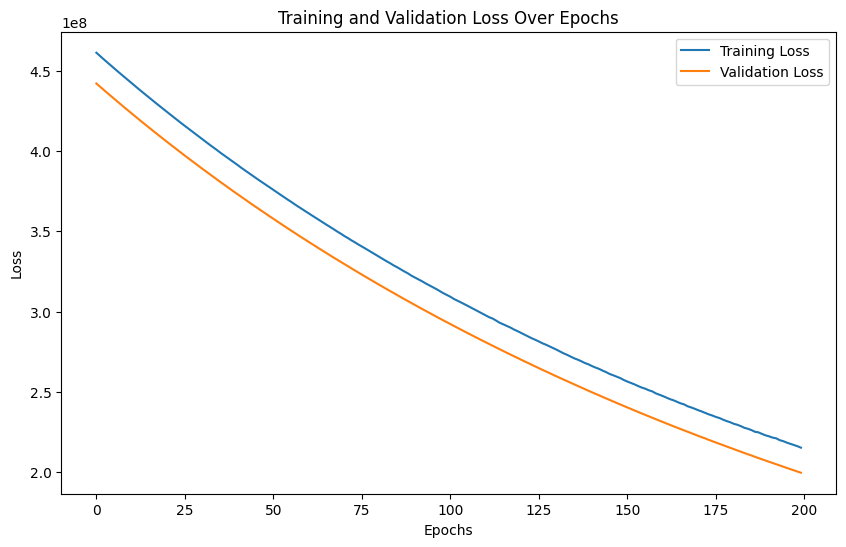

In [86]:
#Setting up the figure size for better visibility.
plt.figure(figsize=(10, 6))

#Plotting the training loss from the history DataFrame. 
#This represents how the model's error decreased over epochs on the training set.
plt.plot(history_df["loss"], label="Training Loss")

#Plotting the validation loss from the history DataFrame.
#This represents how the model's error decreased over epochs on the validation set.
#Comparing the validation loss with the training loss helps in identifying overfitting.
plt.plot(history_df["val_loss"], label="Validation Loss")

#Adding a title to the plot to indicate what is being displayed.
plt.title('Training and Validation Loss Over Epochs')

#Labeling the x-axis as 'Epochs' to represent the number of epochs.
plt.xlabel('Epochs')

#Labeling the y-axis as 'Loss' to represent the loss value.
plt.ylabel('Loss')

# The block of code displays the legend and shows the plot
plt.legend()
plt.show()


## Optimizer change from "Adam" to "rmsprop" was also experimented with to assess if there would be any improvement in the model 

## After running the code there was no improvement in the model

In [104]:
#Printing the evaluation metrics for the ANN model with activation function "tanh"
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
trained_model, history, evaluation_metrics = full_ann_workflow(
    car_sales_df, numerical_features, categorical_features, target, optimizer = 'rmsprop'
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                1728      
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5953 (23.25 KB)
Trainable params: 5953 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 1s 405us/step - loss: 366995552.0000 - mean_squared_error: 366995552.0000 - val_loss: 15696243

1125/1125 [==============================] - 0s 405us/step - loss: 4050438.0000 - mean_squared_error: 4050438.0000 - val_loss: 424346.8750 - val_mean_squared_error: 424346.8750
Epoch 82/200
1125/1125 [==============================] - 1s 608us/step - loss: 3711292.0000 - mean_squared_error: 3711292.0000 - val_loss: 411806.6250 - val_mean_squared_error: 411806.6250
Epoch 83/200
1125/1125 [==============================] - 0s 369us/step - loss: 3810774.0000 - mean_squared_error: 3810774.0000 - val_loss: 408492.1250 - val_mean_squared_error: 408492.1250
Epoch 84/200
1125/1125 [==============================] - 0s 367us/step - loss: 3836252.2500 - mean_squared_error: 3836252.2500 - val_loss: 517746.8125 - val_mean_squared_error: 517746.8125
Epoch 85/200
1125/1125 [==============================] - 0s 362us/step - loss: 4003544.2500 - mean_squared_error: 4003544.2500 - val_loss: 434675.0625 - val_mean_squared_error: 434675.0625
Epoch 86/200
1125/1125 [==============================] - 0s 36

1125/1125 [==============================] - 0s 367us/step - loss: 3857038.5000 - mean_squared_error: 3857038.5000 - val_loss: 393398.3438 - val_mean_squared_error: 393398.3438
Epoch 125/200
1125/1125 [==============================] - 0s 364us/step - loss: 3916363.0000 - mean_squared_error: 3916363.0000 - val_loss: 433541.4062 - val_mean_squared_error: 433541.4062
Epoch 126/200
1125/1125 [==============================] - 0s 370us/step - loss: 4108921.5000 - mean_squared_error: 4108921.5000 - val_loss: 520851.9375 - val_mean_squared_error: 520851.9375
Epoch 127/200
1125/1125 [==============================] - 0s 365us/step - loss: 3742467.7500 - mean_squared_error: 3742467.7500 - val_loss: 406423.0625 - val_mean_squared_error: 406423.0625
Epoch 128/200
1125/1125 [==============================] - 0s 363us/step - loss: 3947985.5000 - mean_squared_error: 3947985.5000 - val_loss: 385951.1250 - val_mean_squared_error: 385951.1250
Epoch 129/200
1125/1125 [==============================] - 

Epoch 167/200
1125/1125 [==============================] - 0s 364us/step - loss: 4004981.5000 - mean_squared_error: 4004981.5000 - val_loss: 333790.8438 - val_mean_squared_error: 333790.8438
Epoch 168/200
1125/1125 [==============================] - 0s 367us/step - loss: 3910291.0000 - mean_squared_error: 3910291.0000 - val_loss: 358876.4688 - val_mean_squared_error: 358876.4688
Epoch 169/200
1125/1125 [==============================] - 0s 361us/step - loss: 3818388.5000 - mean_squared_error: 3818388.5000 - val_loss: 354999.2188 - val_mean_squared_error: 354999.2188
Epoch 170/200
1125/1125 [==============================] - 0s 368us/step - loss: 3916809.0000 - mean_squared_error: 3916809.0000 - val_loss: 407040.2188 - val_mean_squared_error: 407040.2188
Epoch 171/200
1125/1125 [==============================] - 0s 364us/step - loss: 3752673.5000 - mean_squared_error: 3752673.5000 - val_loss: 335886.6250 - val_mean_squared_error: 335886.6250
Epoch 172/200
1125/1125 [====================

In [105]:
#Converting the training history of the ANN model with optimizer "rmsprop"
history_df = pd.DataFrame(history.history)

#Displaying the last 11 entries of the training history DataFrame which helps in understanding how the model's performance evolved in the most recent epochs, indicating convergence or stability.
history_df.tail(11)

loss  mean_squared_error      val_loss  val_mean_squared_error
0   366995552.0         366995552.0  1.569624e+08            1.569624e+08
1    90369816.0          90369816.0  4.778627e+07            4.778627e+07
2    46398116.0          46398116.0  3.244518e+07            3.244518e+07
3    35472524.0          35472524.0  2.409069e+07            2.409069e+07
4    26245332.0          26245332.0  1.596346e+07            1.596346e+07
5    18667582.0          18667582.0  1.096676e+07            1.096676e+07
6    14718576.0          14718576.0  8.061265e+06            8.061265e+06
7    12715784.0          12715784.0  6.207908e+06            6.207908e+06
8    10732992.0          10732992.0  4.973136e+06            4.973136e+06
9     9492541.0           9492541.0  4.098784e+06            4.098784e+06
10    8391922.0           8391922.0  3.427311e+06            3.427311e+06

In [106]:
#Printing the evaluation metrics for the ANN model with optimizer "rmsprop"
#The loop runs through the metrics dictionary and prints out each metric and its corresponding value.
print("Evaluation Metrics for ANN with Categorical and Numerical Features:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics for ANN with Categorical and Numerical Features:
MAE: 339.0481562866211
MSE: 452187.7718800212
RMSE: 672.4490849722537
R2: 0.9983337175044755


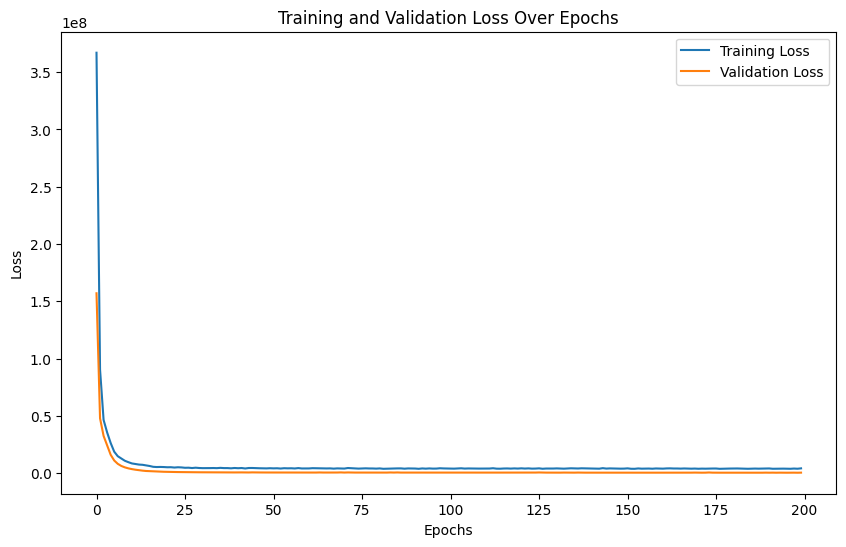

In [107]:
#Setting up the figure size for better visibility.
plt.figure(figsize=(10, 6))

#Plotting the training loss from the history DataFrame. 
#This represents how the model's error decreased over epochs on the training set.
plt.plot(history_df["loss"], label="Training Loss")

#Plotting the validation loss from the history DataFrame.
#This represents how the model's error decreased over epochs on the validation set.
#Comparing the validation loss with the training loss helps in identifying overfitting.
plt.plot(history_df["val_loss"], label="Validation Loss")

#Adding a title to the plot to indicate what is being displayed.
plt.title('Training and Validation Loss Over Epochs')

#Labeling the x-axis as 'Epochs' to represent the number of epochs.
plt.xlabel('Epochs')

#Labeling the y-axis as 'Loss' to represent the loss value.
plt.ylabel('Loss')

# The block of code displays the legend and shows the plot
plt.legend()
plt.show()


## Clustering

## Clustering was explored to determine cluster patterns in the dataset

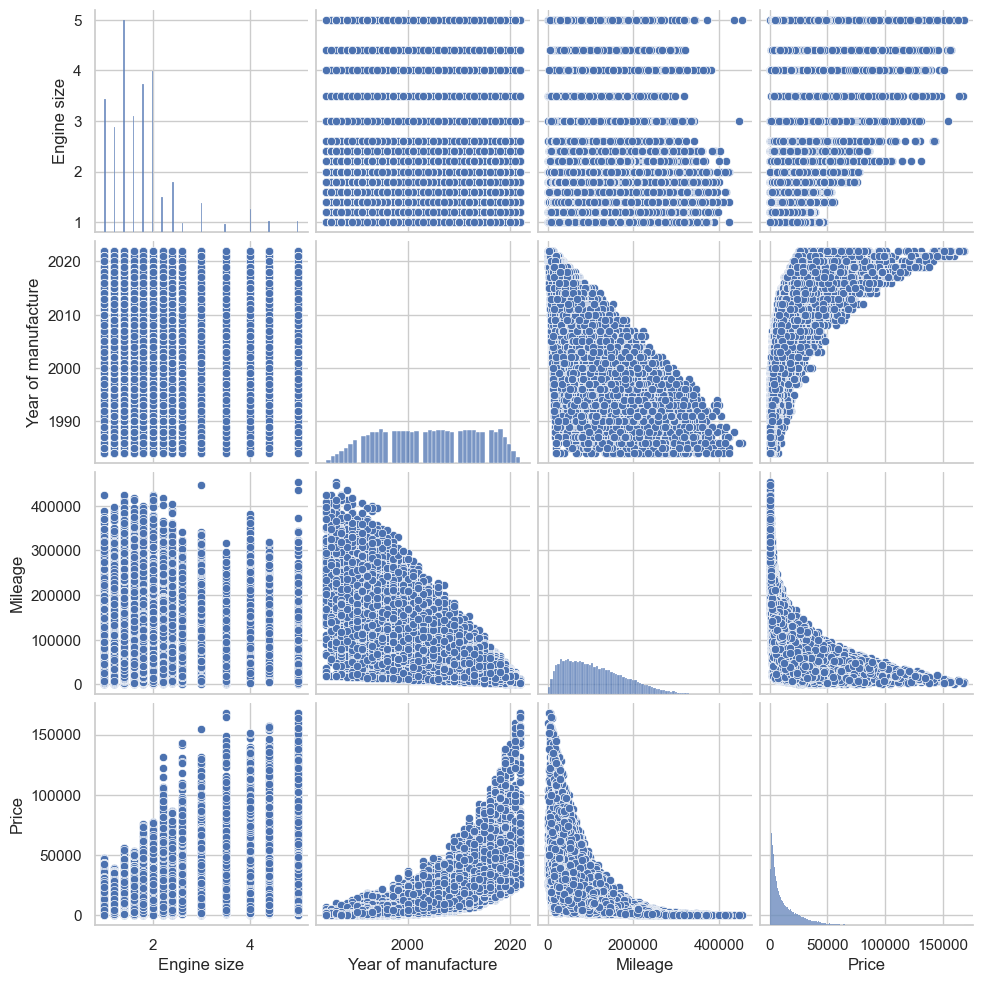

In [4]:
#Function to visualize relationships between multiple numerical variables
#This function creates pair plots as this is useful for spotting trends, correlations, and patterns between numerical variables
def plot_numerical_relationships(dataframe, numerical_vars):
    """
    Function plots relationships between numerical variables using pair plots.

    Parameters:
    - dataframe (DataFrame): The pandas DataFrame containing the data.
    - numerical_vars (list of str): A list of column names representing the numerical variables to plot.

    Returns:
    None: Displays the pair plot of the specified numerical variables.
    """

    # The below line of code sets the visual style of the plots using Seaborn 
    sns.set(style="whitegrid")
    
    # The below line of code creates a pair plot for the specified numerical variables in the given DataFrame
    # Each pair of variables will have a scatter plot, and individual distributions will be shown along the diagonal
    sns.pairplot(dataframe[numerical_vars])
    
    # The below line of code displays the plot
    plt.show()


#Plotting the pair plot

# First define a list of numerical variables from the DataFrame
numerical_vars = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']

# Calling the pair plot function with the DataFrame and the list of variables to generate the pair plots.
plot_numerical_relationships(car_sales_df, numerical_vars)


In [5]:
# Function to scale data using StandardScaler
def scale_data(x):
    """
    Function scales the data using standard scaling.

    Parameters:
    - x (array-like): Data to be scaled.

    Returns:
    array: Scaled version of x.
    """

    # The below block of code initialize StandardScaler and apply it to the data
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # The below line of code returns the scaled data
    return x_scaled


In [6]:
#Function to find and plot the elbow point for KMeans clustering
#This function calculates the inertia for different values of k (number of clusters) and plots them to help identify the elbow point, which can be an indicator of the optimal number of clusters
def find_and_plot_elbow(x_scaled, k_range):
    """
    Function calculates and plots the inertia for a range of k values to determine the optimal number of clusters for KMeans clustering. 
    The 'elbow' in the plot typically represents where the rate of decrease sharply changes, indicating the optimal k.

    Parameters:
    - x_scaled (array-like): Scaled dataset to be used for clustering.
    - k_range (range): A range of k values to test.

    Returns:
    None: Displays a plot of the inertia values for each k.
    """

    # The below line of code creates a list to store inertia values for each k
    inertia_val = []

    # This loops through the specified range of k values
    for k in k_range:
        
        # The block of code intializes KMeans with the current k, fit it to the data, and calculate inertia
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x_scaled)
        inertia_val.append(kmeans.inertia_)  # Append the inertia to the list

    # The below block of code plot the Elbow Curve to visualize the optimal k
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_val, marker='o', linestyle='-')  # Plotting k against inertia
    plt.title('Elbow Method For Optimal k')  # Setting the title of the plot
    plt.xlabel('Number of clusters (k)')  # Labeling the x-axis
    plt.ylabel('Inertia')  # Labeling the y-axis
    plt.xticks(k_range)  # Setting the x-ticks to correspond to the k values
    plt.show()  # Displaying the plot



In [7]:
#Function to perform KMeans clustering on the scaled data
#This function applies KMeans clustering algorithm to the scaled data with the optimal number of cluseter (k)
def perform_clustering(x_scaled, optimal_k):
    """
    Function performs KMeans clustering on the scaled data using the specified number of clusters. 
    It basically fits the KMeans model to the data and assigns each data point to a cluster, returning the labels.

    Parameters:
    - x_scaled (array-like): The scaled dataset to cluster.
    - optimal_k (int): The optimal number of clusters determined, for example, by the elbow method.

    Returns:
    array: An array of cluster labels indicating the cluster each data point belongs to.
    """

    # The line of code initializes the KMeans model with the specified number of clusters 
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)

    # The below line of code fits the model to the x_scaled data and predicts the cluster labels for each data point
    cluster_labels = kmeans.fit_predict(x_scaled)
    
    # This returns the cluster labels after the Kmeans clustering is performed
    return cluster_labels


In [8]:
#Function to calculate clustering evaluation metrics
#This function computes the Davies-Bouldin and Silhouette scores for the given clustering labels and data
#Lower Davies-Bouldin score and higher Silhouette score indicate better clustering.
def calculate_evaluation_metrics(x_scaled, cluster_labels):
    """
    Function computes the Davies-Bouldin score and the Silhouette score, 

    Parameters:
    - x_scaled (array-like): The scaled dataset that was clustered.
    - cluster_labels (array-like): The cluster labels for each data point in the dataset.

    Returns:
    tuple: A tuple containing the Davies-Bouldin score and the Silhouette score.
    """

    # The below line of code calculates the Davies-Bouldin score from the scaled data and cluster labels for each data point
    db_score = davies_bouldin_score(x_scaled, cluster_labels)

     # The below line of code calculates the Davies-Bouldin score from the scaled data and cluster labels
    s_score = silhouette_score(x_scaled, cluster_labels)
    
    # This line of code returns the calculated Davies-Bouldin and Silhouette scores
    return db_score, s_score


In [9]:
#Function to plot the clusters based on two selected features
#This function adds the cluster labels to the dataframe
#It then creates a scatter plot to visualize how the data points are clustered based on the specified features
def plot_clusters(df, cluster_labels, feature1, feature2):
    """
    Function computes the clusters on a scatter plot based on two specified features. This visualization helps in understanding 
    the distribution and separation of clusters in the context of the selected features.

    Parameters:
    - df (DataFrame): The original dataframe containing the data.
    - cluster_labels (array-like): The cluster labels for each data point.
    - feature1 (str): The name of the first feature to plot.
    - feature2 (str): The name of the second feature to plot.

    Returns:
    None: Displays a scatter plot of the clusters based on the specified features.
    """

    # Adding the cluster labels as a new column in the dataframe for easy plotting
    df['cluster_labels'] = cluster_labels

    # Creating a scatter plot with Seaborn. The 'hue' parameter is used to color the points based on the cluster labels
    # This helps in visually distinguishing the different clusters
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='cluster_labels')
    
    # Setting the title of the plot to indicate which features are being visualized
    plt.title(f'Clusters with {feature1} and {feature2}')
    
    # Displaying the plot
    plt.show()


## K-Means Price vs Engine Size

In [15]:
# The below line of code selects the features 'Engine size' and 'Price' from the car_sales_df DataFrame
feature_names = ["Engine size", "Price"]
x = car_sales_df[feature_names]  # x now holds the selected features from the DataFrame


In [16]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

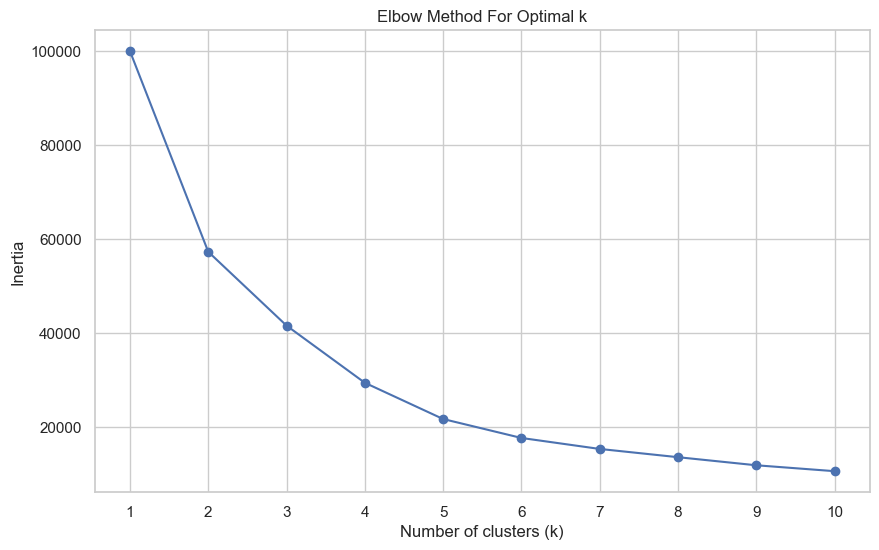

In [17]:
# The below line of code defines a range of k values from 1 to 10 for testing in the k-means clustering algorithm
# This range will be used to find the "elbow" which indicates the optimal k value
k_range = range(1, 11)

# The below line of code calls the 'find_and_plot_elbow' function which computes the Sum of Squared Distances (SSD) for each k value
# It then plots the SSDs to visualize the elbow point, aiding in the selection of the optimal number of clusters for k-means
find_and_plot_elbow(x_scaled, k_range)

In [19]:
# Setting the Optimal Number of Clusters
optimal_k = 4  # The value 4 is chosen as the optimal number of clusters based on the elbow method analysis

# Performing k-meanrClustering with Optimal k
cluster_labels = perform_clustering(x_scaled, optimal_k)  

# Calculating Cluster Evaluation Metrics (Davis-Bouldin Score ans Silhoutte Score)
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)  

# Output the Evaluation Scores
print(f"Silhouette Score: {s_score}")  # Silhouette Score quantifies how similar an object is to its own cluster compared to other clusters
print(f"Davies-Bouldin Score: {db_score}")  # Davies-Bouldin Score indicates the average 'similarity' between clusters, lower is better


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4929355833898306
Davies-Bouldin Score: 0.763613727574842


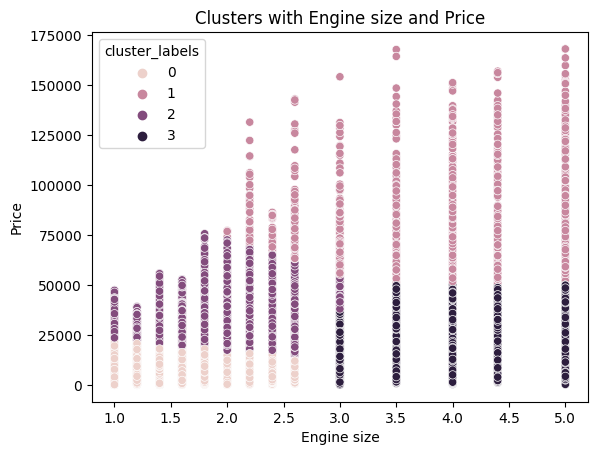

In [64]:
#Visualizing the clusters 
plot_clusters(car_sales_df, cluster_labels, 'Engine size', 'Price')

### K-Means Price vs Year of Manufacture

In [20]:
# The below line of code selects the features 'Year of manufacture' and 'Price' from the car_sales_df DataFrame
feature_names = ["Year of manufacture", "Price"] # x now holds the selected features from the DataFrame

# x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [21]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

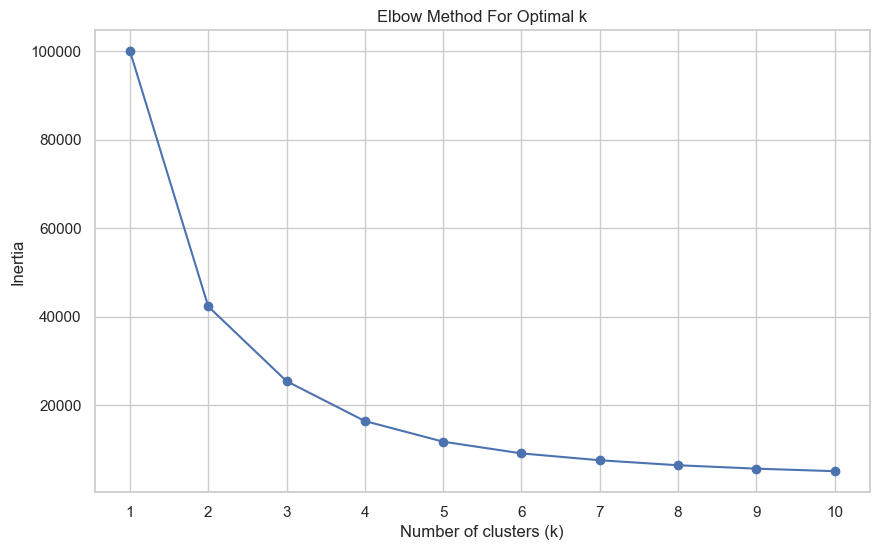

In [22]:
# The below line of code defines a range of k values from 1 to 10 for testing in the k-means clustering algorithm
# This range will be used to find the "elbow" which indicates the optimal k value
k_range = range(1, 11)

# The below line of code calls the 'find_and_plot_elbow' function which computes the Sum of Squared Distances (SSD) for each k value
# It then plots the SSDs to visualize the elbow point, aiding in the selection of the optimal number of clusters for k-means
find_and_plot_elbow(x_scaled, k_range)

In [42]:
# Setting the Optimal Number of Clusters
optimal_k = 3  # The value 3 is chosen as the optimal number of clusters based on the elbow method analysis

# Performing k-meanrClustering with Optimal k
cluster_labels = perform_clustering(x_scaled, optimal_k)  

# Calculating Cluster Evaluation Metrics (Davis-Bouldin Score ans Silhoutte Score)
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)  

# Output the Evaluation Scores
print(f"Silhouette Score: {s_score}")  # Silhouette Score quantifies how similar an object is to its own cluster compared to other clusters
print(f"Davies-Bouldin Score: {db_score}")  # Davies-Bouldin Score indicates the average 'similarity' between clusters, lower is better


C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5139323508345855
Davies-Bouldin Score: 0.6865797429818379


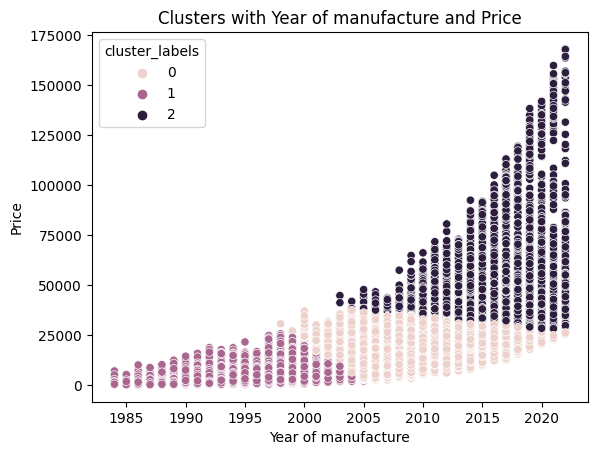

In [43]:
#visualizing the clusters
plot_clusters(car_sales_df, cluster_labels, 'Year of manufacture', 'Price')

### K-Means Price vs Mileage

In [11]:
# The below line of code selects the features 'Mileage' and 'Price' from the car_sales_df DataFrame
feature_names = ["Mileage", "Price"] # x now holds the selected features from the DataFrame

# x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [12]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

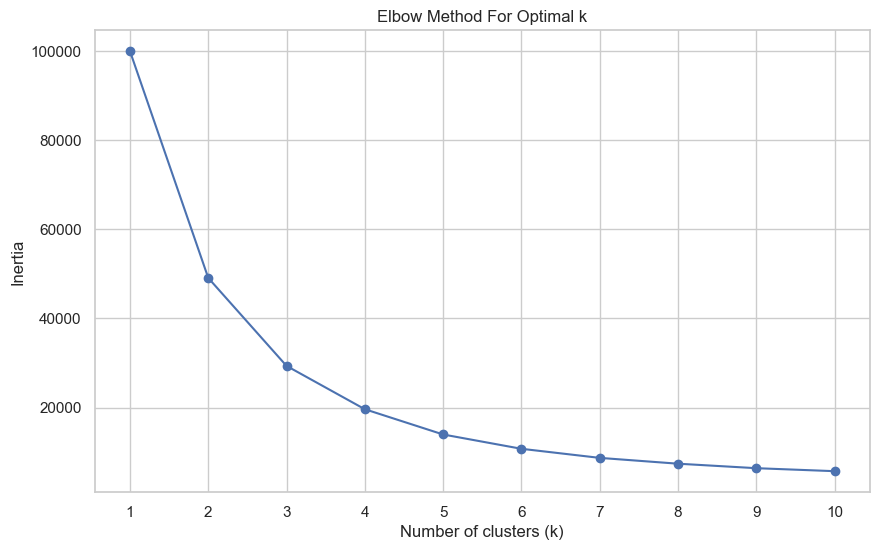

In [13]:
# The below line of code defines a range of k values from 1 to 10 for testing in the k-means clustering algorithm
# This range will be used to find the "elbow" which indicates the optimal k value
k_range = range(1, 11)

# The below line of code calls the 'find_and_plot_elbow' function which computes the Sum of Squared Distances (SSD) for each k value
# It then plots the SSDs to visualize the elbow point, aiding in the selection of the optimal number of clusters for k-means
find_and_plot_elbow(x_scaled, k_range)

In [14]:
# Setting the Optimal Number of Clusters
optimal_k = 3  # The value 3 is chosen as the optimal number of clusters based on the elbow method analysis

# Performing k-meanrClustering with Optimal k
cluster_labels = perform_clustering(x_scaled, optimal_k)  

# Calculating Cluster Evaluation Metrics (Davis-Bouldin Score ans Silhoutte Score)
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)  

# Output the Evaluation Scores
print(f"Silhouette Score: {s_score}")  # Silhouette Score quantifies how similar an object is to its own cluster compared to other clusters
print(f"Davies-Bouldin Score: {db_score}")  # Davies-Bouldin Score indicates the average 'similarity' between clusters, lower is better

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.47863555506769007
Davies-Bouldin Score: 0.6870284140356961


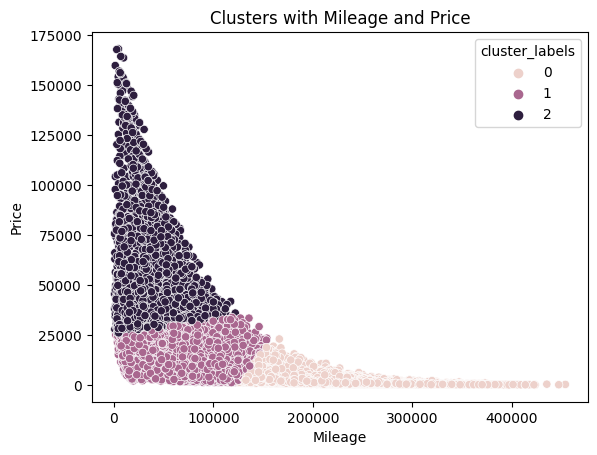

In [75]:
#visualizing the clusters
plot_clusters(car_sales_df, cluster_labels, 'Mileage', 'Price')

## Hierachical Clustering 

In [34]:
# Defining Agglomerative Clustering Function
def perform_agglomerative_clustering(x_scaled, n_clusters=3, linkage='complete'):
    """
    Function performs agglomerative clustering on the scaled feature set.
    
    Parameters:
    - x_scaled: array-like or matrix, shape (n_samples, n_features), scaled feature set.
    - n_clusters: int, default=3, the number of clusters to find.
    - linkage: {“ward”, “complete”, “average”, “single”}, default='complete', which linkage criterion to use.

    Returns:
    - cluster_labels: ndarray, shape (n_samples,), cluster labels for each point.
    """
    
    #The below line of code initializes the AgglomerativeClustering model
    agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    
    # The below line of code fits the model and predict cluster labels for the dataset
    cluster_labels = agg_model.fit_predict(x_scaled)
    
    # Return the cluster labels after fitting the model
    return cluster_labels

### Hierachical Clustering (Engine Size and Price)

In [35]:
#The below line of code selects the features 'Engine size' and 'Price' from the car_sales_df DataFrame
feature_names = ["Engine size", "Price"] # x now holds the selected features from the DataFrame

#x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [36]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

In [37]:
# The below line of code applies agglomerative clustering to the scaled feature set (x_scaled) 
# The code uses 3 clusters and 'complete' linkage
cluster_labels = perform_agglomerative_clustering(x_scaled, n_clusters=3, linkage='complete')

# The below line of code calculates the Davies-Bouldin and Silhouette scores for the clustering result to evaluate its performance
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)

# The below lines of code print the calculated Silhouette and Davies-Bouldin scores to the console for review and analysis
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.6205455891141066
Davies-Bouldin Score: 0.6576468371244552


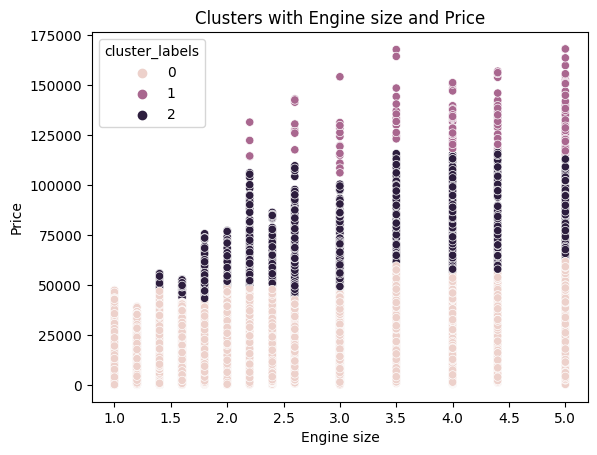

In [38]:
#Visualizing the clusters
plot_clusters(car_sales_df, cluster_labels, 'Engine size', 'Price')

### Hierachical Clustering (Year of Manufacture and Price)

In [39]:
#The below line of code selects the features 'Year of manufacture' and 'Price' from the car_sales_df DataFrame
feature_names = ["Year of manufacture", "Price"]

#x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [40]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

In [41]:
# The below line of code applies agglomerative clustering to the scaled feature set (x_scaled) 
# The code uses 3 clusters and 'complete' linkage
cluster_labels = perform_agglomerative_clustering(x_scaled, n_clusters=3, linkage='complete')

# The below line of code calculates the Davies-Bouldin and Silhouette scores for the clustering result to evaluate its performance
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)

# The below lines of code print the calculated Silhouette and Davies-Bouldin scores to the console for review and analysis
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.6377197429857607
Davies-Bouldin Score: 0.4638829041762535


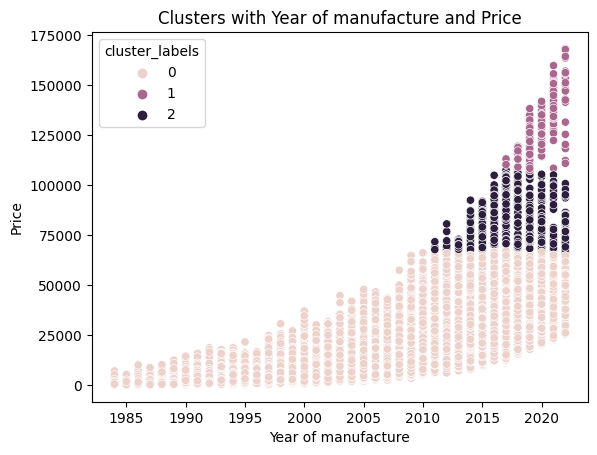

In [45]:
#visualizing the clusters
plot_clusters(car_sales_df, cluster_labels, 'Year of manufacture', 'Price')

### Hierachical Clustering (Mileage and Price)

In [46]:
#The below line of code selects the features 'Mileage' and 'Price' from the car_sales_df DataFrame
feature_names = ["Mileage", "Price"] # x now holds the selected features from the DataFrame

#x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [47]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

In [48]:
# The below line of code applies agglomerative clustering to the scaled feature set (x_scaled) 
# The code uses 3 clusters and 'complete' linkage
cluster_labels = perform_agglomerative_clustering(x_scaled, n_clusters=3, linkage='complete')

# The below line of code calculates the Davies-Bouldin and Silhouette scores for the clustering result to evaluate its performance
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)

# The below lines of code print the calculated Silhouette and Davies-Bouldin scores to the console for review and analysis
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.4329131473278011
Davies-Bouldin Score: 0.5642557186876899


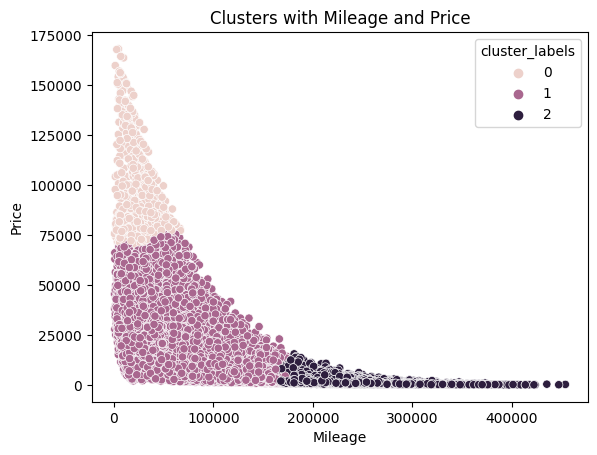

In [49]:
#Visualizing the plot
plot_clusters(car_sales_df, cluster_labels, 'Mileage', 'Price')

## DBSCAN

In [15]:
def perform_DBSCAN_clustering(x_scaled, eps=0.2, min_samples=3):
    """
    Function creates and applies a DBSCAN clustering model to the scaled feature set.

    Parameters:
    - x_scaled: array-like or matrix, shape (n_samples, n_features), the scaled feature set to be clustered.
    - eps: float, default=0.2, the maximum distance between two samples for one to be considered as in the neighborhood of the other.
    - min_samples: int, default=3, the number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
    - cluster_labels: array, shape (n_samples,), the labels of the clusters each sample belongs to.
    """

    # The below line of code initializes the DBSCAN model with the specified epsilon (eps) and minimum samples (min_samples)
    DBSCAN_model = DBSCAN(eps=eps, min_samples=min_samples)

    # The below line of code fits the DBSCAN model to the scaled data and predicts the cluster labels for each data point
    cluster_labels = DBSCAN_model.fit_predict(x_scaled)

    # Returning the Cluster Labels
    return cluster_labels


## DBSCAN (Engine Size and Price)

In [16]:
#The below line of code selects the features 'Engine size' and 'Price' from the car_sales_df DataFrame
feature_names = ["Engine size", "Price"] # x now holds the selected features from the DataFrame

#x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [17]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

In [18]:
# The below line of code performs DBSCAN clustering on the scaled data with eps=0.2 and min_samples=3
cluster_labels = perform_DBSCAN_clustering(x_scaled, eps=0.2, min_samples=3)

# The below line of code calculates the Davies-Bouldin and Silhouette scores for assessing the quality of the clusters formed by DBSCAN
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)

# The below lines of code print the Silhouette and Davies-Bouldin scores to evaluate the clustering performance
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.06080145542005066
Davies-Bouldin Score: 2.6414439105037637


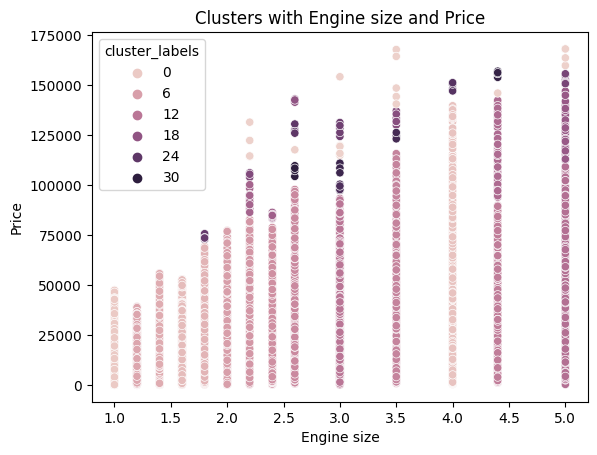

In [19]:
# Visualizing the clusters
plot_clusters(car_sales_df, cluster_labels, 'Engine size', 'Price')

## DBSCAN (Year of Manufacture and Price)

In [27]:
#The below line of code selects the features 'Year of manufacture' and 'Price' from the car_sales_df DataFrame
feature_names = ["Year of manufacture", "Price"] # x now holds the selected features from the DataFrame

#x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [28]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

In [29]:
# The below line of code performs DBSCAN clustering on the scaled data with eps=0.2 and min_samples=3
cluster_labels = perform_DBSCAN_clustering(x_scaled, eps=0.2, min_samples=3)

# The below line of code calculates the Davies-Bouldin and Silhouette scores for assessing the quality of the clusters formed by DBSCAN
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)

# The below lines of code print the Silhouette and Davies-Bouldin scores to evaluate the clustering performance
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.6763268357510991
Davies-Bouldin Score: 1.4951884498621943


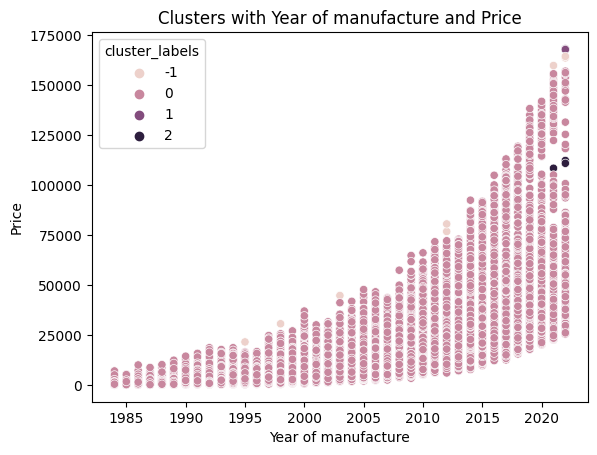

In [30]:
# Visualizing the clusters
plot_clusters(car_sales_df, cluster_labels, 'Year of manufacture', 'Price')

## DBSCAN (Mileage and Price)

In [48]:
#The below line of code selects the features 'Mileage' and 'Price' from the car_sales_df DataFrame
feature_names = ["Mileage", "Price"] # x now holds the selected features from the DataFrame

#x now holds the selected features from the DataFrame
x = car_sales_df[feature_names]

In [49]:
# The below line of code applies scaling to the selected features to normalize their range.
x_scaled = scale_data(x)

In [46]:
# The below line of code performs DBSCAN clustering on the scaled data with eps=0.2 and min_samples=3
cluster_labels = perform_DBSCAN_clustering(x_scaled, eps=0.2, min_samples=3)

# The below line of code calculates the Davies-Bouldin and Silhouette scores for assessing the quality of the clusters formed by DBSCAN
db_score, s_score = calculate_evaluation_metrics(x_scaled, cluster_labels)

# The below lines of code print the Silhouette and Davies-Bouldin scores to evaluate the clustering performance
print(f"Silhouette Score: {s_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.8177700973670058
Davies-Bouldin Score: 0.1569647347938632


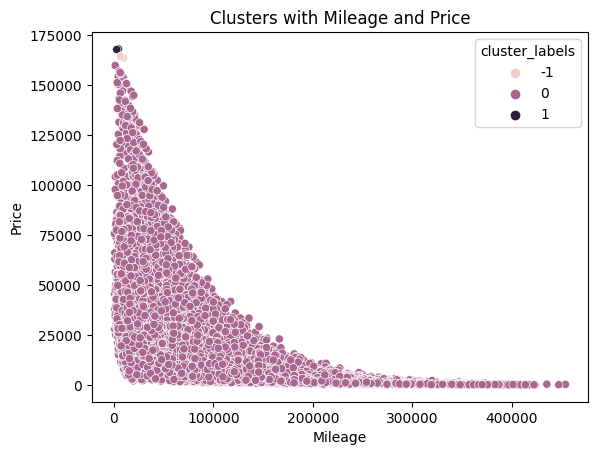

In [47]:
#Visualizing the plot
plot_clusters(car_sales_df, cluster_labels, 'Mileage', 'Price')